In [135]:
pip install pandas seaborn matplotlib numpy openpyxl statsmodels

Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## **Introduction**

The most general goal for any economy is to hope for an exogenous shock, propelling the economy to a state that would have never been reached rapidly if the goal were to improve the economy by increasing capital per worker. This is often modeled through analysis of steady-state theories, where economists consider variables, such as capital and labour (K and L), output, and population, grow at a constant rate. Nevertheless, the real world shows difficulties in such analysis as economies tend to be more volatile in contrast to economic theories where most predictions follow smooth trajectories. This is typical because economists often assume exogenous and endogenous factors unless some variables are set/predicted to change.

The goal of this research is to determine the consistency of our Solow Growth Model while in comparison with real-world data. As students of economics, we tend to use well-established and strong economies for our examples; however, we rarely consider using less-powerful economies during our studies. Therefore, we will be using datasets from diverse countries while revolving around their steady-state capital-per-worker, "k".

It should be considered that countries will experience shocks alongside a steady-state. While it is true that economic shocks do have correlations to steady-states, the conclusion is often nuanced as it is sometimes unpredictable to end positively or negatively. To alleviate this uncertainty, we will determine whether or not the neoclassical growth models are adequate enough to explain how a country will recover or react to these shocks.

Throughout this research, we will be using the Solow Growth Model as our staple neoclassical growth model to determine whether or not it provides an adequate prediction similar to real-life results provided by our datasets. Our emphasis will lean towards observing the relationships between the growth rates of our variables and steady-state values. Once we have established whether or not the Solow Growth Model’s approximations are adequately accurate, we will then be suggesting the possibilities of both endogenous and exogenous factors such as consumption and technological shocks by **suggesting** the Impulse Response Function (IRF). However, it is not our primary task; instead, this is just a recommendation for future economists to consider using. Our goal is to determine how accurate these models are for potential usage on predicting steady-state acquisition in the real world.

## **Literature Review**

##### **Neoclassical Growth Models and Steady State Economies**

While  the Solow Growth Model may be too simplistic when predicting real life instances in determining a country’s ETA for steady state, there have been numerous real-world applications in which the growth model has been used to do exactly this. East Asian countries such as Japan, South Korean, Taiwan, and Singapore have experienced high savings and investment rates, leading to a constant increase in capital per worker. As the country moved past its rapid economic growth, economists used neoclassical growth models such as the Solow Growth Model to determine the slow-down of these East Asian economies. In sight of research provided by the World Bank, it was determined that these countries experienced a diminishing returns in capital per worker, and that productivity now dictated the fate of their steady states[^1]. Other instances of using Solow Growth Model to discover why and how a country reached a steady state after economic shocks are 1. The Income Convergence of the EU, 2. New Growth Accounting of the US, and 3. Economic Analysis following World War 2.

However, following these instances of utilizing the Solow Growth Model, the formula has never been able to precisely predict the exact required time to reach such a state; the model only loosely calculates the speed of which an economy grows based on the factors of savings rates, population growth, and technological ingenuity.

##### **Economic Shocks**

While the Solow Growth Model can be utilized to discover why and how fast a steady state country had reached its state, it does not account for possible exogenous shocks such as technological advancements or general rapid growth that have affected endogenous factors; variables such as consumption (regarding wealth, income, preferences) and population (in reference to technological prowess and demographics) remain independent without the influence of possible external factors until an economy begins to experience change in exogenous variables such as government policies, global economic shocks, technological advancements, birth rates, and immigration. To put further perspective into this, Canada’s population growth has been experiencing rapid growth due to the leniency in exogenous immigration policies; while birth rates and death rates for Canadians are big factors to Canada’s overall population, such exogenous influence has boosted Canada’s population growth rate [^2]. To counteract this issue in regards to neoclassical growth models, we will consider suggesting the IRF if the Solow Growth Model is insufficient in accounting for exogenous influences.

##### **Implications**

In this project, we aim to extend the Solow Growth Model to estimate country-specific steady-state growth rates, building on studies such as those by Paolo Casadio, Antonio Paradiso, and B. Bhaskara Rao, who examined steady-state growth in five European countries. Their research explored the impacts of trade openness, human capital, and investment-to-GDP ratios, and provided recommendations for achieving steady-state growth targets. For instance, they suggested that Italy would need to raise its investment-to-GDP ratio (IRAT) to nearly 30% to reach a 0.5% steady-state growth rate [^3]. Similarly, through our project and calculations, we aim to predict realistic paths to steady-state growth by analyzing GDP, population growth, gross domestic savings, total labor force, and capital stock.
Taking China as an example, its strategy of stimulus-driven growth has led to diminishing returns, evidenced by a slowing economy and falling property prices, particularly in smaller, poorer cities that collectively account for over 60% of the nation's GDP. Housing prices in many third- and fourth-tier cities have dropped by more than 20% over the last four years, indicating that the current growth strategy requires increasingly larger investments to sustain the same GDP growth per capita [^4].  For countries facing similar challenges, we hope to provide targeted policy recommendations by the conclusion of this project, offering insights for more sustainable, effective growth strategies.
Limitations
Note that the Solow growth model does not account for institutional factors like governance quality, trade policies, or financial stability, all of which significantly influence economic growth. As a result, our steady-state predictions may overlook the impact of unique national policies for certain countries. Furthermore, the Solow Model is often applied as if each country operates in a closed economy, meaning it doesn't account for international trade or capital flows, which are crucial for many economies’ growth. To help mitigate this issue, it is our goal to implement the aforementioned variations of the Solow Growth Model as a secondary analysis.

##### **Parameter Alpha: A Short Analysis**

Before diving into our research, we must acknowledge our implications for using 0.3 for our alpha value:

However, this is not reflective of the Solow Growth model, and it is a mistake to assume this application of alpha should be reflected in the Solow Growth Model. Instead, our decision was to set our alpha value to 0.3 follows the following reasons:
1. Such a parameter has been deemed consistent with empirical findings regarding the research behind capital's share of income in national accounts, especially those in national accounts.
2. A Solow Growth model relies on diminishing returns to capital. This requirement will slowly cause an economy to reach a steady state. Assuming a low value such as 0.05 for alpha, this would imply a lack of capital influence in economic growth. This is reflected in Miller's and Ulrich's journal.
3. Alpha = 0.05 is effective for analyzing low-capital intensive economies, which means the only way these economies can grow, we imply that these economies are labour-intensive. This might be reflective of poorer countries where capital is scarce; however, it does not properly represent established economies where capital is the economy's strongest role.
4. The use of alpha = 0.3 is derived from the analysis of country datasets, explaining that a country's economy tends to have income share of capital closer to 0.3 instead of 0.05. This matches the trends on savings rates, capital growth, and economic growth. For instance, Charles I. Jones of U.C. Berkley and NBER wrote in his 2003 paper *Growth, Capital Shares, and a New Perspective on Production Functions* where Jones illustrated a graph where members of the Organisation for Economic Co-operation and Development listed country capital share growth rates from 1960 to 2000 from around as low as 0.1 to 0.4; however, each graph suggested an average growth of around 0.32 to 0.40. [^6].

Our decision to choose 0.3 for alpha is based on the research conducted to fit the real-world data represented in both available datasets and our datasets.

### References

[^1]: World Bank. (1993). The East Asian miracle: Economic growth and public policy. Oxford University Press.

[^2]: CIC News. (2023, October 31). Canada announces Immigration Levels Plan 2024-2026. CIC News. Retrieved November 10, 2024, from https://www.cicnews.com
https://www.sciencedirect.com/science/article/pii/S026499931200082X

[^3]: Casadio, P., Paradiso, A., & Rao, B. B. (2012, March 16). Estimates of the steady state growth rates for some European countries. Economic Modelling.

[^4]: Rogoff, K. (2022, November 2). China’s diminishing returns: By Kenneth Rogoff. Project Syndicate. https://www.project-syndicate.org/commentary/china-diminishing-returns-real-estate-housing-slowdown-by-kenneth-rogoff-2022-10

[^5]: Miller J, Ulrich R. The quest for an optimal alpha. PLoS One. 2019 Jan 2;14(1):e0208631. doi: 10.1371/journal.pone.0208631. PMID: 30601826; PMCID: PMC6314595.

[^6]: Jones, C. I. (2003). Growth, capital shares, and a new perspective on production functions (Preliminary — Comments appreciated). https://www.frbsf.org/economic-research/wp-content/uploads/sites/4/jones_alpha100.pdf. p. 6-8.


# Data Cleaning, Processing, and Preparation

**Our initial step involves collecting data on the key variables and parameters utilized in the Solow growth model, including Real GDP (in 2015 USD), Capital Stock, Gross Annual Savings, Population, and Labour Force. To maintain consistency and comparability, all data has been sourced  from the World Bank. However, before the data can be utilized for analysis, it must undergo a comprehensive process of cleaning, processing, and reformatting to create a usable dataset that will allow us to address our research question.**

**The code below imports the datasets from the World Bank, selects a random sample of 28 countries, and isolates the period from 1991 to 2023. A notable methodological concern is the potential for selection bias in our sample. The countries and time frame were chosen because they provided the most complete datasets with minimal missing data. While this approach ensures a more robust analysis, it also introduces the possibility of bias. Consequently, any conclusions we draw about the validity and accuracy of the Solow growth model must be interpreted with caution, as the results may be influenced by the specific selection of countries and time periods.**

**Once the countries and years are finalized, the code performs key transformations. Gross Annual Savings is converted to the Annual Savings Rate, while Population and Labour Force are used to compute the Population Growth Rate and Labour Force Growth Rate — essential parameters for the Solow model. Finally, the data is reorganized from a panel format into a long format, which serves as our final working dataset. Additional data will be incorporated into this dataset at later stages in the analysis.**

In [98]:
#read all csv files:
GDP_Data = pd.read_csv('RGDP_Data.csv', skiprows=3) #this is real GDP n 2015 USD
Capital_Stock_Data = pd.read_csv('Capital_Stock_Data.csv', skiprows=3)
Gross_Savings_Data = pd.read_csv('Gross_Savings_Data.csv', skiprows=3)
Population_Data = pd.read_csv('Population_Data.csv', skiprows=3)
Labor_Force_Data = pd.read_csv('Labor_Force_Data.csv', skiprows=3)

# List of countries to include
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Filter for the selected countries
GDP_Data1 = GDP_Data[GDP_Data['Country Name'].isin(selected_countries)]
Capital_Stock_Data1 = Capital_Stock_Data[Capital_Stock_Data['Country Name'].isin(selected_countries)]
Gross_Savings_Data1 = Gross_Savings_Data[Gross_Savings_Data['Country Name'].isin(selected_countries)]
Population_Data1 = Population_Data[Population_Data['Country Name'].isin(selected_countries)]
Labor_Force_Data1 = Labor_Force_Data[Labor_Force_Data['Country Name'].isin(selected_countries)]

# Select the first three columns, plus the columns within the year range 1992-2023
columns_GDP = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in GDP_Data.columns if col.isdigit() and 1992 <= int(col) <= 2023]

columns_GDI = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Capital_Stock_Data.columns if col.isdigit() and 1992 <= int(col) <= 2023]

columns_Pop = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Population_Data.columns if col.isdigit() and 1990 <= int(col) <= 2023]

columns_savings = ["Country Name", "Country Code", "Indicator Name"] + \
                  [col for col in Gross_Savings_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

columns_labor = ["Country Name", "Country Code", "Indicator Name"] + \
                [col for col in Labor_Force_Data.columns if col.isdigit() and 1990 <= int(col) <= 2023]

# Apply the columns filter to each dataset
GDP_Data2 = GDP_Data1[columns_GDP]
Capital_Stock_Data2 = Capital_Stock_Data1[columns_GDP]
Population_Data2 = Population_Data1[columns_Pop]
Gross_Savings_Data2 = Gross_Savings_Data1[columns_savings]
Labor_Force_Data2 = Labor_Force_Data1[columns_labor]


In [99]:
# Define a function to calculate annual growth starting from 1992 based on year-over-year % changes
# This `row` will represent a country's or region's data throughout the years
def calculate_annual_growth(row):
    growth_rates = {}
    # For 1992 to 2023, we compute growth using the previous year
    # To do this, we loop years from 1992 to 2023
    for year in range(1992, 2024):
        prev_year = str(year - 1) # change current and previous years to strings, identical to column names
        current_year = str(year)
        # Check for non-null and numeric data
        if (prev_year in row and current_year in row and
            pd.notnull(row[prev_year]) and pd.notnull(row[current_year]) and
            row[prev_year] != 0):
            growth_rates[current_year] = (row[current_year] - row[prev_year]) / row[prev_year] #calculation for % change from the previous year
        else:
            growth_rates[current_year] = pd.NA
    return pd.Series(growth_rates)

# Create Population Growth Rate Data
Population_Growth_Data = Population_Data2.apply(calculate_annual_growth, axis=1)
Population_Growth_Data = pd.concat([Population_Data2[["Country Name", "Country Code", "Indicator Name"]], Population_Growth_Data], axis=1)
Population_Growth_Data["Indicator Name"] = Population_Growth_Data["Indicator Name"].replace("Population, total", "Pop Annual Growth Rate")

# Create Labor Force Growth Rate Data
Labor_Force_Growth_Data = Labor_Force_Data2.apply(calculate_annual_growth, axis=1)
Labor_Force_Growth_Data = pd.concat([Labor_Force_Data2[["Country Name", "Country Code", "Indicator Name"]], Labor_Force_Growth_Data], axis=1)
Labor_Force_Growth_Data["Indicator Name"] = Labor_Force_Growth_Data["Indicator Name"].replace("Labor force, total", "Labor Annual Growth Rate")

# Define a function to calculate savings rate from total savings and total GDP
def calculate_savings_rate(row):
    savings_rate = {}
    for year in range(1992, 2024):
        year_str = str(year)
        if year_str in row and year_str in GDP_Data2.columns:
            gdp_value = GDP_Data2.loc[row.name, year_str]
            if pd.notnull(gdp_value) and gdp_value != 0 and pd.notnull(row[year_str]):
                savings_rate[year_str] = (row[year_str] / gdp_value)
            else:
                savings_rate[year_str] = pd.NA
        else:
            savings_rate[year_str] = pd.NA
    return pd.Series(savings_rate)

# Create Savings Rate Data
Savings_Rate_Data = Gross_Savings_Data2.iloc[:, 3:].apply(calculate_savings_rate, axis=1)
Savings_Rate_Data = pd.concat([Gross_Savings_Data2[["Country Name", "Country Code", "Indicator Name"]], Savings_Rate_Data], axis=1)

# Save the resulting datasets to an intermediate Excel file
with pd.ExcelWriter('Project_Data.xlsx') as writer:
    GDP_Data2.to_excel(writer, sheet_name='GDP Data', index=False)
    Capital_Stock_Data2.to_excel(writer, sheet_name='Capital Stock Data', index=False)
    Savings_Rate_Data.to_excel(writer, sheet_name='Savings Rate Data', index=False)
    Population_Growth_Data.to_excel(writer, sheet_name='Population Growth Rate Data', index=False)
    Labor_Force_Growth_Data.to_excel(writer, sheet_name='Labour Growth Rate Data', index=False)
    Labor_Force_Data2.to_excel(writer, sheet_name='Labour Data', index=False)
    Population_Data2.to_excel(writer, sheet_name='Population', index=False)

In [100]:
# Load each cleaned dataset
GDP_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='GDP Data')
Capital_Stock_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Capital Stock Data')
Gross_Savings_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Savings Rate Data')
Population_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Population Growth Rate Data')
Labor_Force_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Labour Growth Rate Data')
Labor_Force_Data2_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Labour Data')
Population_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Population')

# Define a helper function to melt a dataframe from wide to long format
def melt_data(df, value_name):
    id_vars = ["Country Name", "Country Code", "Indicator Name"]
    year_cols = [col for col in df.columns if col.isdigit()]
    df_melted = df.melt(id_vars=id_vars, value_vars=year_cols, var_name="Year", value_name=value_name)
    df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors='coerce')
    df_melted = df_melted.drop(columns=["Indicator Name"])
    return df_melted

# Melt each dataset to long format
gdp_long = melt_data(GDP_Data_Cleaned, "GDP")
capital_long = melt_data(Capital_Stock_Data_Cleaned, "Capital Stock")
savings_long = melt_data(Gross_Savings_Data_Cleaned, "Savings Rate")
population_long = melt_data(Population_Data_Cleaned, "Pop Growth Rate")
labor_long = melt_data(Labor_Force_Data_Cleaned, "Labour Force Growth Rate")
labor_long2 = melt_data(Labor_Force_Data2_Cleaned, "Labour Force")
population_long2 = melt_data(Population_Cleaned, "Population")


# Merge all datasets on Country Name, Country Code, and Year
merged_df = gdp_long.merge(capital_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(savings_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(labor_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(population_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(labor_long2, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(population_long2, on=["Country Name", "Country Code", "Year"], how="left")

# Sort by Country Name and Year
merged_df.sort_values(["Country Name", "Year"], inplace=True)

# Save the final merged dataset
merged_df.to_excel("Final_Dataset.xlsx", index=False)

In [101]:
#lets view our final dataset and make sure there are no missing values
df = pd.read_excel("Final_Dataset.xlsx")
print(df.head())
df.info()

  Country Name Country Code  Year           GDP  Capital Stock  Savings Rate  \
0    Argentina          ARG  1992  313120000000   3.821158e+10      0.110822   
1    Argentina          ARG  1993  338818000000   4.660997e+10      0.120766   
2    Argentina          ARG  1994  358592000000   5.139950e+10      0.121265   
3    Argentina          ARG  1995  348389000000   4.773693e+10      0.133980   
4    Argentina          ARG  1996  367644000000   5.340632e+10      0.140460   

   Labour Force Growth Rate  Pop Growth Rate  Labour Force  Population  
0                  0.029395         0.013971      14275486    33568285  
1                  0.029565         0.013672      14697546    34027240  
2                  0.025143         0.013561      15067090    34488696  
3                  0.008917         0.013263      15201443    34946110  
4                  0.023820         0.012684      15563537    35389362  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

Now that our data is prepared, we can visualize our parameters of interest.

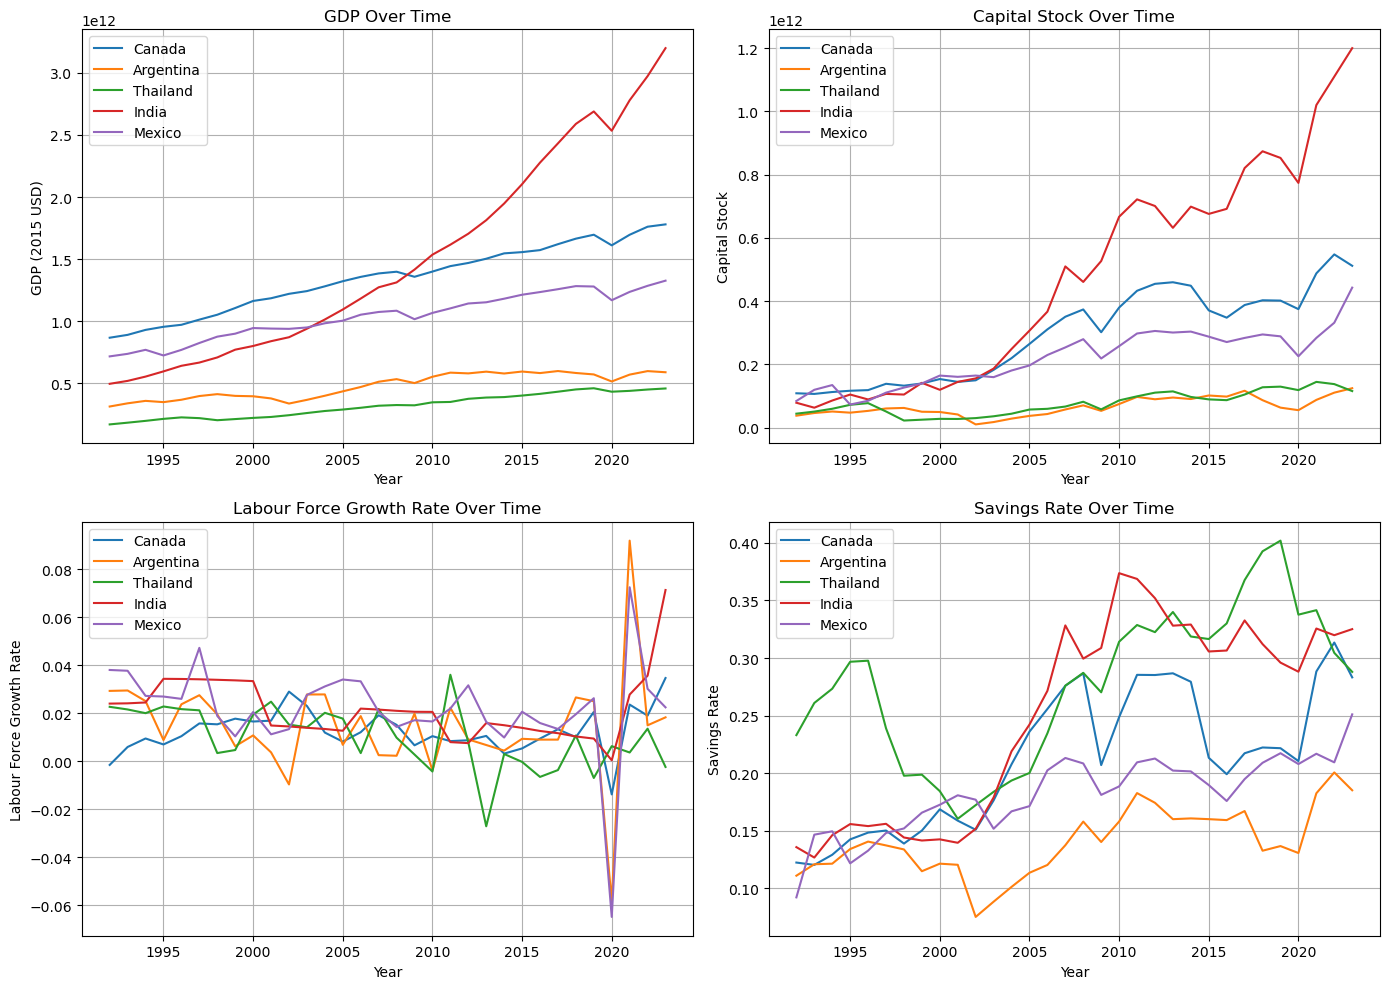

In [102]:
countries_to_plot = ["Canada", "Argentina", "Thailand", "India", "Mexico"]

# Filter the dataframe for these countries
plot_df = df[df["Country Name"].isin(countries_to_plot)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax_gdp, ax_capital, ax_lfg, ax_savings = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# Plot GDP
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_gdp.plot(country_data["Year"], country_data["GDP"], label=country)
ax_gdp.set_title("GDP Over Time")
ax_gdp.set_xlabel("Year")
ax_gdp.set_ylabel("GDP (2015 USD)")
ax_gdp.grid(True)
ax_gdp.legend()

# Plot Capital Stock
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_capital.plot(country_data["Year"], country_data["Capital Stock"], label=country)
ax_capital.set_title("Capital Stock Over Time")
ax_capital.set_xlabel("Year")
ax_capital.set_ylabel("Capital Stock")
ax_capital.grid(True)
ax_capital.legend()

# Plot Labour Force Growth Rate
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_lfg.plot(country_data["Year"], country_data["Labour Force Growth Rate"], label=country)
ax_lfg.set_title("Labour Force Growth Rate Over Time")
ax_lfg.set_xlabel("Year")
ax_lfg.set_ylabel("Labour Force Growth Rate")
ax_lfg.grid(True)
ax_lfg.legend()

# Plot Savings Rate
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_savings.plot(country_data["Year"], country_data["Savings Rate"], label=country)
ax_savings.set_title("Savings Rate Over Time")
ax_savings.set_xlabel("Year")
ax_savings.set_ylabel("Savings Rate")
ax_savings.grid(True)
ax_savings.legend()

plt.tight_layout()
plt.show()


# Data Analysis

### Analyzing Economic Interdependence and the Role of Non-Economic Variables in Economic Growth

Before conducting the steady-state analysis, we wanted to apply data analytics to explore questions related to regional and global economic interdependence and to regress key non-economic variables to better understand their dynamics within an economy. Our analysis will be structured into three main parts.

**Part 1: Correlation Analysis of Economic Growth**  
First, we will conduct a **correlation analysis** of variables related to economic growth, mainly **GDP**, across countries in our dataset. With this analysis, we hope to understand the dynamics of economic interdependence between countries and regions across the world. Here, we are severely simplifying the notion of interdependece to mean that if two countries general grow and fall at the same time, they must (at least to some degree) be interdependent on each other. Of course, this is not completely true as correlation does not imply causation and correlation alone is not an indicator of economic interdependence as you also have to consider factors like the level of trade between these countries, and other factors. However, correlation does generally provide a good indication that two coutnries might be strongly economically connected, as our analysis will later demonstrate, yet its important to mention that sometimes, these correlations can be just flukes as even two countries that are not at all economically related to each other could be highly correlated (although this is more rare). The following analysis will allow us to address key questions about economic interdependence, such as:

- ARE global economies interdependent with one another?
- How strong is the interdependence between specific economies?  
- Which countries exhibit the highest and lowest degrees of economic interdependence?  
- How does the level of interdependence differ between high-income, middle-income, and low-income countries?
- How has economic interdependence evolved over time (are countries more dependent today or in the past)?

**Part 2: Regional Correlation Analysis**  

Again, it would be overly simplistic to equate correlation with true economic interdependence. However, for the purposes of this analysis, we will operate under the assumption that a high correlation between the core economic variables of two countries reflects a degree of economic interdependence.

Our approach begins by classifying countries into regional groups and conducting a regional correlation analysis. This analysis will be carried out in two stages. First, we will analyze the correlation of economic growth within each region, such as **the EU, Middle East, Asia, and Latin America**, to identify which regions exhibit the highest levels of internal economic interdependence. Second, we will conduct a cross-regional analysis to measure the correlation of economic growth between regions, providing insight into cross-regional linkages. Again, our analysis will suffer from selection bias, such as the fact that there are only a few EU countries in our dataset (which also doesn't include the UK, an essential EU country). This analysis will allow us to answer key questions, such as:

- Which regions (e.g., EU, Middle East, Asia) exhibit the highest and lowest levels of internal economic interdependence?  
- Which regional pairings (e.g., EU-Middle East, Asia-Latin America) exhibit the strongest cross-regional economic interdependence?  

**Part 3: Regression Analysis of Non-Economic Variables**  
In the third section, we will incorporate key non-economic variables that are hypothesized to influence economic growth. Specifically, we will import data on the following variables:

- Freedom House Index (which measures political rights and civil liberties)  
- Life Expectancy Rate  
- Literacy Rate 
- Gini Coefficient (which measures income inequality)  
- V-Dem measure of regime types  

These variables will be regressed on key economic outcomes, including:  
- **GDP** (to understand the direct relationship between these variables and economic growth)  
- **GDP per capita** (as a measure of welfare, beyond economic growth)  

**This three-part analysis aims to provide a comprehensive view of economic interdependence and the role of non-economic variables in shaping key economic outcomes.**


### Part 1: Correlational Analysis of Core Economic Variables

In [103]:
#Correlation Matrix Table of GDP Across All Countries

# Load the final merged dataset
merged_df0 = pd.read_excel("Final_Dataset.xlsx")

# Check if required columns exist
required_columns = ['Country Name', 'Year', 'GDP']
missing_columns = [col for col in required_columns if col not in merged_df.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing from the dataset: {missing_columns}")

# Pivot the data to have countries as columns and years as rows
gdp_pivot = merged_df0.pivot(index='Year', columns='Country Name', values='GDP')

# Compute the correlation matrix
corr_matrix = gdp_pivot.corr()

print(f"Correlation Matrix of GDP Across {len(corr_matrix.columns)} Countries:")
display(corr_matrix)


Correlation Matrix of GDP Across 24 Countries:


Country Name,Argentina,Australia,Bangladesh,Brazil,Canada,China,Colombia,Germany,Greece,India,...,Mexico,Mozambique,Poland,Rwanda,Saudi Arabia,South Africa,Tanzania,Thailand,Uganda,United States
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.914529,0.831901,0.968775,0.909290,0.872942,0.921563,0.909594,0.266576,0.871224,...,0.925215,0.911198,0.896283,0.848965,0.917211,0.960309,0.862160,0.929381,0.893915,0.891345
Australia,0.914529,1.000000,0.964419,0.966339,0.992413,0.977414,0.983905,0.989933,0.266677,0.979456,...,0.980347,0.992425,0.993625,0.967060,0.978339,0.978931,0.976976,0.988871,0.989039,0.993377
Bangladesh,0.831901,0.964419,1.000000,0.889631,0.935639,0.994922,0.977118,0.954028,0.091065,0.994369,...,0.913459,0.974315,0.984122,0.995113,0.972897,0.901535,0.996360,0.951017,0.989124,0.954394
Brazil,0.968775,0.966339,0.889631,1.000000,0.963319,0.921134,0.953856,0.949928,0.303221,0.917868,...,0.957701,0.954329,0.945866,0.902572,0.946810,0.988928,0.913857,0.967767,0.943781,0.947514
Canada,0.909290,0.992413,0.935639,0.963319,1.000000,0.949373,0.962783,0.989147,0.353004,0.955490,...,0.991143,0.974396,0.978896,0.938504,0.955001,0.980381,0.950167,0.977382,0.966093,0.996151
China,0.872942,0.977414,0.994922,0.921134,0.949373,1.000000,0.990588,0.967936,0.094016,0.997807,...,0.932418,0.989752,0.990209,0.994586,0.988619,0.931878,0.999247,0.972334,0.997059,0.961558
Colombia,0.921563,0.983905,0.977118,0.953856,0.962783,0.990588,1.000000,0.975926,0.137443,0.990357,...,0.953626,0.993359,0.988262,0.981407,0.995727,0.960591,0.987575,0.985313,0.992972,0.966363
Germany,0.909594,0.989933,0.954028,0.949928,0.989147,0.967936,0.975926,1.000000,0.252938,0.972818,...,0.986566,0.985072,0.985201,0.956245,0.971191,0.971568,0.967967,0.982143,0.977058,0.988593
Greece,0.266576,0.266677,0.091065,0.303221,0.353004,0.094016,0.137443,0.252938,1.000000,0.117138,...,0.337506,0.163880,0.216069,0.097790,0.107381,0.336197,0.105366,0.222395,0.152820,0.331279


**Here we found an issue that most countries were far too correlated. This means that the dimension of time was causing this issue because if all countries are growing throughout time, then our estimation of correlation between these countries will be inflated. So, to adjust for this, we will instead find GDP growth rate and then do our correlation based on that. This will resolve the inflated results due to time, and we should actually be able to see the true correlation of economic growth between these countries.**


In [104]:
# Load the final merged dataset again
merged_df = pd.read_excel("Final_Dataset.xlsx")

# Calculate GDP Growth Rate
merged_df = merged_df.sort_values(['Country Name', 'Year'])
merged_df['GDP Growth Rate'] = merged_df.groupby('Country Name')['GDP'].pct_change()

merged_df.head()

,Country Name,Country Code,Year,GDP,Capital Stock,Savings Rate,Labour Force Growth Rate,Pop Growth Rate,Labour Force,Population,GDP Growth Rate
0,Argentina,ARG,1992,313120000000,3.821158e+10,0.110822,0.029395,0.013971,14275486,33568285,NaN
1,Argentina,ARG,1993,338818000000,4.660997e+10,0.120766,0.029565,0.013672,14697546,34027240,0.082071
2,Argentina,ARG,1994,358592000000,5.139950e+10,0.121265,0.025143,0.013561,15067090,34488696,0.058362
3,Argentina,ARG,1995,348389000000,4.773693e+10,0.133980,0.008917,0.013263,15201443,34946110,-0.028453
4,Argentina,ARG,1996,367644000000,5.340632e+10,0.140460,0.023820,0.012684,15563537,35389362,0.055269


In [105]:
# Pivot the data to have countries as columns and years as rows
gdp_growth_pivot = merged_df.pivot(index='Year', columns='Country Name', values='GDP Growth Rate')

# Compute the correlation matrix
corr_matrix = gdp_growth_pivot.corr()

print(f"Correlation Matrix of GDP Growth Rate Across {len(corr_matrix.columns)} Countries:")
display(corr_matrix)

Correlation Matrix of GDP Growth Rate Across 24 Countries:


Country Name,Argentina,Australia,Bangladesh,Brazil,Canada,China,Colombia,Germany,Greece,India,...,Mexico,Mozambique,Poland,Rwanda,Saudi Arabia,South Africa,Tanzania,Thailand,Uganda,United States
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.260605,0.233902,0.568928,0.460639,0.535874,0.657506,0.487724,0.256196,0.456203,...,0.651748,0.227704,0.535593,-0.131259,0.600226,0.589480,0.074510,0.230487,0.113239,0.520130
Australia,0.260605,1.000000,-0.111669,0.406826,0.662421,0.373215,0.225163,0.291755,0.463746,0.395531,...,0.520240,0.477649,0.474890,0.018990,0.111828,0.542414,-0.116333,0.344751,0.337007,0.575944
Bangladesh,0.233902,-0.111669,1.000000,-0.012852,0.160198,-0.144368,0.454476,0.409638,0.056038,0.382999,...,0.212911,-0.274126,0.307001,0.291335,0.400330,0.204928,0.478275,0.048495,-0.105384,0.107945
Brazil,0.568928,0.406826,-0.012852,1.000000,0.537085,0.622540,0.623343,0.414089,0.206367,0.236883,...,0.384925,0.129632,0.398553,-0.074631,0.267051,0.675053,-0.014347,0.467813,0.342838,0.336492
Canada,0.460639,0.662421,0.160198,0.537085,1.000000,0.310687,0.517697,0.749609,0.551001,0.501700,...,0.740486,0.264033,0.601758,-0.023571,0.292149,0.708079,0.057417,0.329696,0.066461,0.862470
China,0.535874,0.373215,-0.144368,0.622540,0.310687,1.000000,0.492716,0.240229,0.148295,0.369503,...,0.236499,0.443421,0.442576,-0.173387,0.088422,0.650711,0.017685,0.533812,0.603099,0.253037
Colombia,0.657506,0.225163,0.454476,0.623343,0.517697,0.492716,1.000000,0.497067,0.295575,0.521208,...,0.443505,0.050679,0.564512,0.030897,0.567780,0.690758,0.207944,0.405214,0.205349,0.377324
Germany,0.487724,0.291755,0.409638,0.414089,0.749609,0.240229,0.497067,1.000000,0.301998,0.405262,...,0.675602,0.126032,0.557718,0.059368,0.395164,0.636277,0.272388,0.244181,0.086253,0.644233
Greece,0.256196,0.463746,0.056038,0.206367,0.551001,0.148295,0.295575,0.301998,1.000000,0.419908,...,0.392244,0.191352,0.522968,0.113830,0.031988,0.505600,0.038298,0.156861,0.088461,0.590810


**These results are more accurate. One way we can tell is by looking at the correlation between some countries which we know are highly correlated. Like US-Canada which we see have a correlation of 0.86 which is strong. Another thing to notice is that even countries that we would expect to have very high correlations, like China-India, have lower correlations and this can be because they were less dependent in the past, which is making the correlation value go down. Let's check this by isolating China-India's GDP growth rates throughout time to see their correlation.**

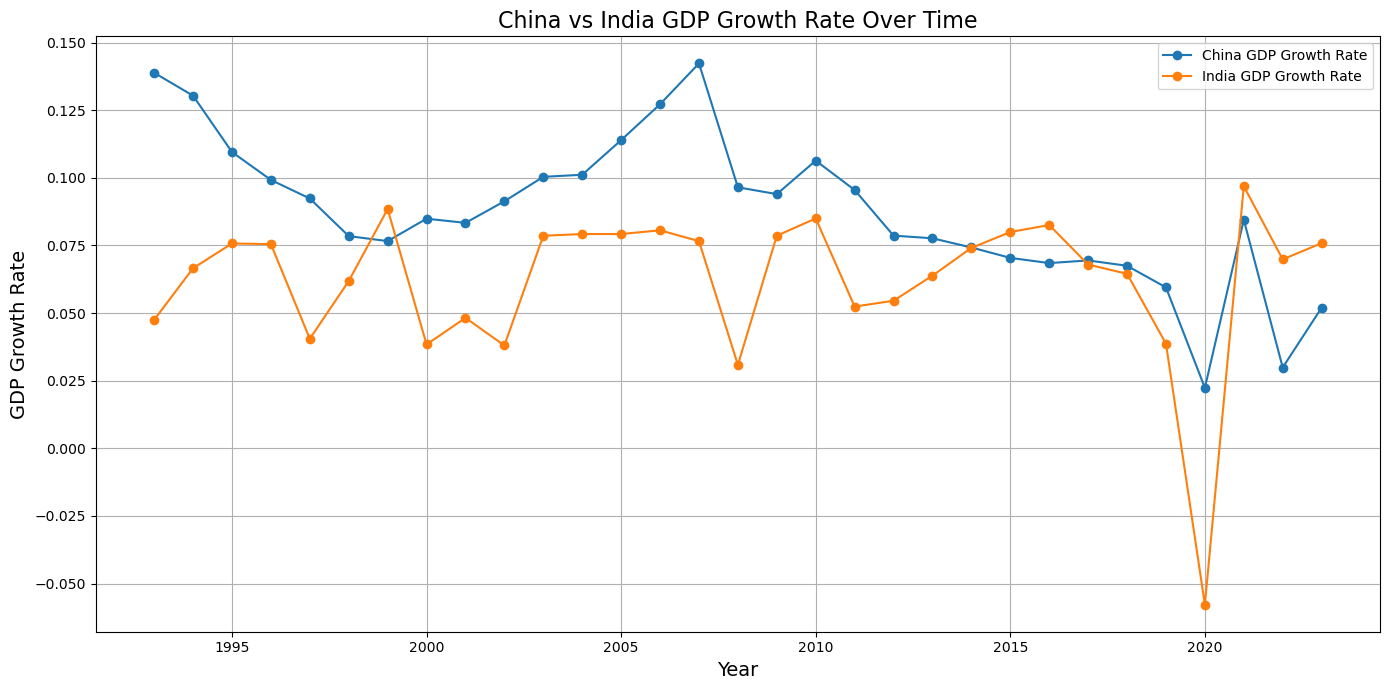

In [106]:
##Correlation Between China and India GDP Growth Rate Over Time

# Select China and India GDP Growth Rate
china_growth = gdp_growth_pivot['China']
india_growth = gdp_growth_pivot['India']

# Drop years where either China or India has NaN GDP Growth Rate
growth_df = pd.DataFrame({
    'China GDP Growth Rate': china_growth,
    'India GDP Growth Rate': india_growth,
}).dropna()

# Plot the GDP Growth Rates of China and India over time
plt.figure(figsize=(14, 7))
plt.plot(growth_df.index, growth_df['China GDP Growth Rate'], label='China GDP Growth Rate', marker='o')
plt.plot(growth_df.index, growth_df['India GDP Growth Rate'], label='India GDP Growth Rate', marker='o')
plt.title('China vs India GDP Growth Rate Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Our guess was correct as we see that China and India's correlation is much higher in the past few years than in the past. We can see this because China and India's GDPs are moving more similarly in the last few years than in the past. As such, we can conclude that our data is consistent with logic, but to further demonstrate this, the following provides a list of the most and least correlated countries with USA and China (the two current economic great powers), and the results we get should also be consistent with what we know about these countries.**


In [107]:
# Compute the correlation matrix
corr_matrix = gdp_growth_pivot.corr()

# List of countries to analyze for most and least correlated
countries_of_interest = ["United States", "China", "Egypt"]

# Function to get top 5 most and least correlated countries for a given country
def get_top_correlations(corr_matrix, country, top_n=5):
    if country not in corr_matrix.columns:
        print(f"{country} not found in the correlation matrix.")
        return pd.Series(dtype='float'), pd.Series(dtype='float')
    sorted_corr = corr_matrix[country].sort_values(ascending=False)
    top_corr = sorted_corr[sorted_corr.index != country].head(top_n)
    bottom_corr = sorted_corr.tail(top_n)
    return top_corr, bottom_corr

# Display the top 5 most and least correlated countries for each country of interest
for country in countries_of_interest:
    top_corr, bottom_corr = get_top_correlations(corr_matrix, country)
    print(f"\nTop 5 Countries Most Correlated with {country}:")
    print(top_corr)
    print(f"\nTop 5 Countries Least Correlated with {country}:")
    print(bottom_corr)


Top 5 Countries Most Correlated with United States:
Country Name
Canada          0.862470
Mexico          0.777294
Japan           0.696506
Germany         0.644233
South Africa    0.600935
Name: United States, dtype: float64

Top 5 Countries Least Correlated with United States:
Country Name
Bangladesh    0.107945
Uganda       -0.013848
Rwanda       -0.021094
Indonesia    -0.039793
Tanzania     -0.059620
Name: United States, dtype: float64

Top 5 Countries Most Correlated with China:
Country Name
South Africa    0.650711
Brazil          0.622540
Uganda          0.603099
Argentina       0.535874
Thailand        0.533812
Name: China, dtype: float64

Top 5 Countries Least Correlated with China:
Country Name
Kenya           0.104759
Saudi Arabia    0.088422
Tanzania        0.017685
Bangladesh     -0.144368
Rwanda         -0.173387
Name: China, dtype: float64
Egypt not found in the correlation matrix.

Top 5 Countries Most Correlated with Egypt:
Series([], dtype: float64)

Top 5 Countries 

**Here, we see that Canada, Mexico, and Japan are among the most correlated countries to the US which makes sense as the US has the highest trades and strongest economic relations with these countries. On the other end, countries like Tanzania, and Rawanda are the least correlated, with their correlation even being negative, meaning that when the US economy grows, their economies fall. This is consistent with the World-Systems and Marxist theories which suggest that the core countries, the more developed and advanced economies in the global stage, take advantage of the third-world developing countries to maintain their growth at the expense of the growth of these low-income countries. Another reason for this can just be that these countries faced serious political and economic crises several times in our data range which caused their economic growth to decline, while no such financial crises affected the US and it continued to grow. As such, the negative correlation occured because the US economy was growing while these economies were declining. The data is also logically consistent with China as it is most correlated with SA, Brazil (two other countries with which China has strong economic ties, demonstrated by its partnership with these countries in the economic international organization of BRICS), and Uganda and Thailand, two countries that China consistently provides a lot of economic investments in.**

**Next, let's look at how countries of different income levels are correlated with each other in terms of economic growth. To do this, we will assign the countries in our dataset to one of three categories of "High Income", "Middle Income", or "Low Income", simply based on what we know about these countries and their relative GDP's, and conduct correlation analysis of annual economic growth between these categories to see which categories are the most correlated.**

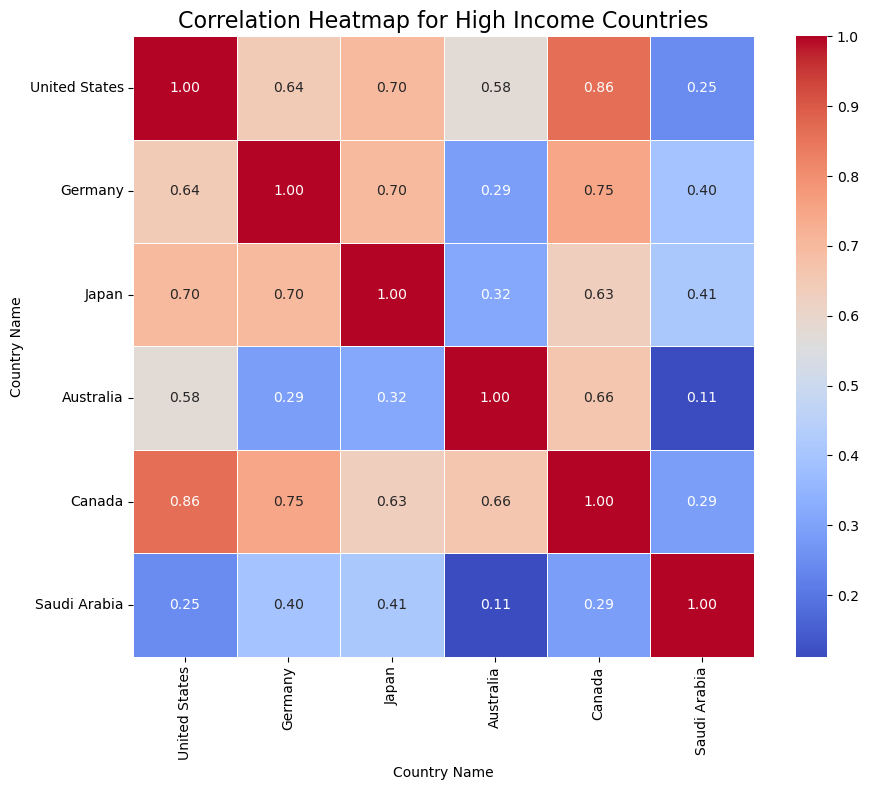

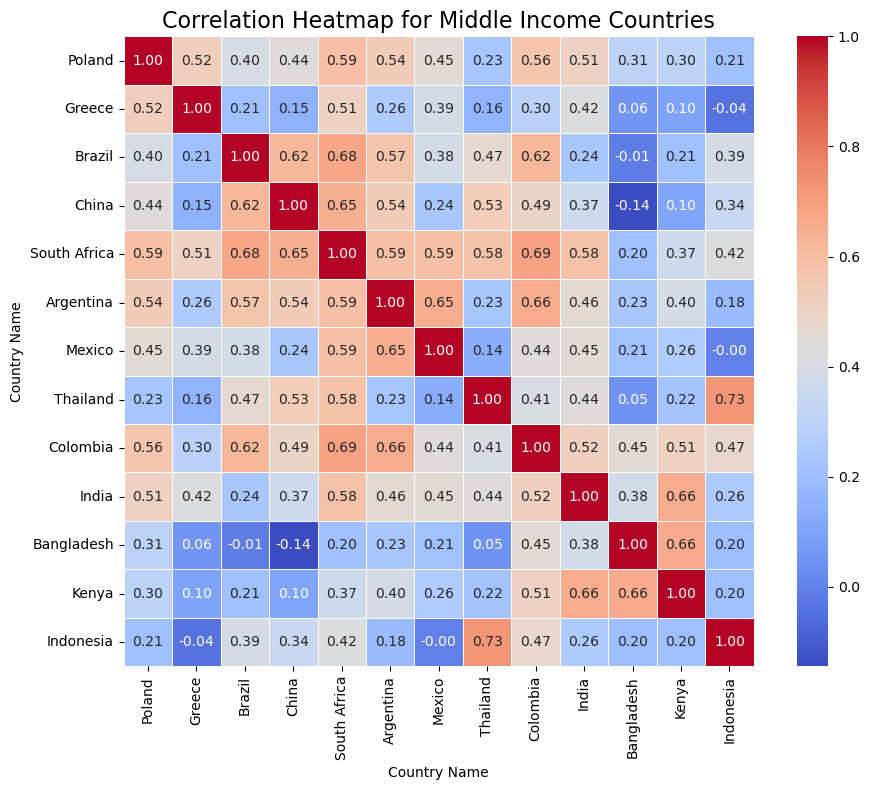

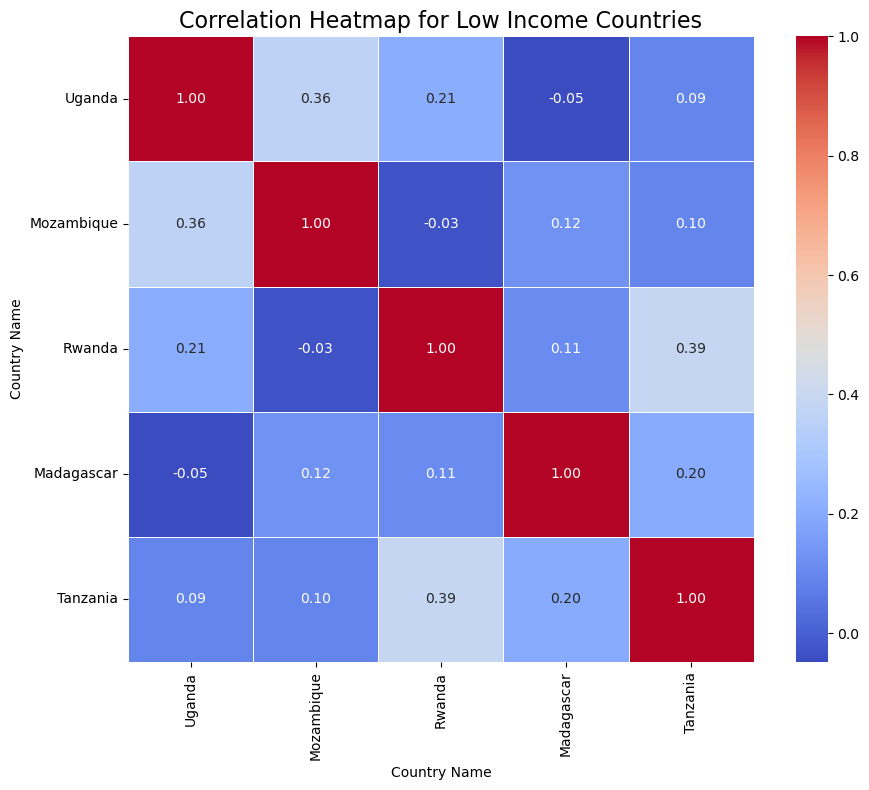


Average Correlation Between Income Groups:


,High Income,Middle Income,Low Income
High Income,0.51,0.39,0.17
Middle Income,0.39,0.38,0.19
Low Income,0.17,0.19,0.15


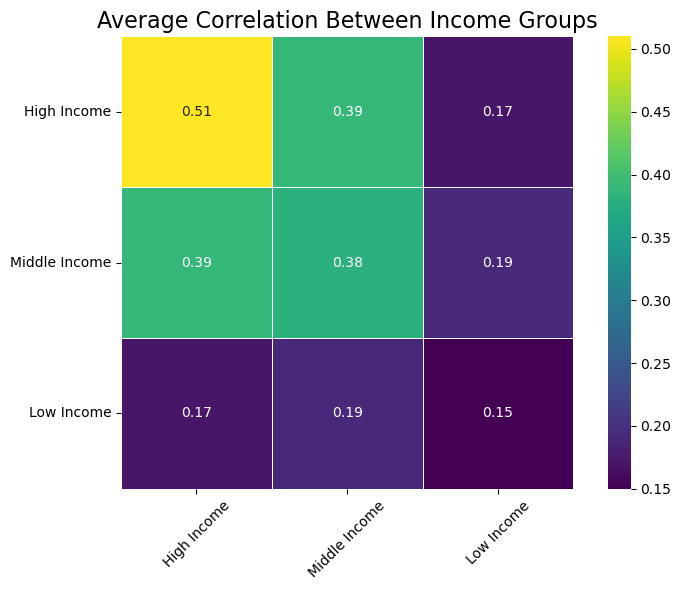

In [108]:
##Identifying Most and Least Correlated Countries & Correlation by Income Groups

# Define income groups based on World Bank classifications
high_income = ["United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia"]
middle_income = ["Poland", "Greece", "Brazil", "China", "South Africa", "Russia", "Argentina",
                "Mexico", "Turkey", "Thailand", "Colombia", "India", "Egypt", "Bangladesh",
                "Vietnam", "Kenya", "Indonesia"]
low_income = ["Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"]


# Create a dictionary for income groups
income_groups = {
    "High Income": high_income,
    "Middle Income": middle_income,
    "Low Income": low_income
}

# Get the list of all available countries in the correlation matrix
available_countries = corr_matrix.columns.tolist()

# Adjust income groups to include only available countries
for group in income_groups:
    income_groups[group] = [country for country in income_groups[group] if country in available_countries]

# Function to plot correlation heatmap for a given group
def plot_income_correlation(group_name, countries):
    # Ensure that the countries exist in the correlation matrix
    if not countries:
        print(f"No available countries found for {group_name} group.")
        return
    group_corr = corr_matrix.loc[countries, countries]

    plt.figure(figsize=(10, 8))
    sns.heatmap(group_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap for {group_name} Countries', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmaps for each income group
for group, countries in income_groups.items():
    plot_income_correlation(group, countries)

# Additionally, analyze average correlations between different income groups
group_names = list(income_groups.keys())
average_corr_between_groups = pd.DataFrame(index=group_names, columns=group_names)

for group1 in group_names:
    for group2 in group_names:
        # Select the relevant subset of the correlation matrix
        subset = corr_matrix.loc[income_groups[group1], income_groups[group2]]
        # Convert to numpy array and exclude self-correlations if same group
        if group1 == group2:
            mask = ~np.eye(len(subset), dtype=bool)
            subset_values = subset.values[mask]
        else:
            subset_values = subset.values.flatten()
        # Remove NaN values
        subset_values = subset_values[~np.isnan(subset_values)]
        # Calculate the average correlation
        if len(subset_values) > 0:
            avg_corr = np.mean(subset_values)
            average_corr_between_groups.loc[group1, group2] = round(avg_corr, 2)
        else:
            average_corr_between_groups.loc[group1, group2] = np.nan

print("\nAverage Correlation Between Income Groups:")
display(average_corr_between_groups.astype(float))

# Plot the average correlation heatmap between income groups
plt.figure(figsize=(8, 6))
sns.heatmap(average_corr_between_groups.astype(float), annot=True, fmt=".2f", cmap='viridis', linewidths=.5, square=True)
plt.title('Average Correlation Between Income Groups', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## **Heatmaps and Correlations**

To clearly describe the linkages between nations and regions, we used heatmaps as a method of correlation analysis and explanation. Heatmaps illustrate the relationship between countries or regions based on economic and income variables. The values range from -1 to +1, where +1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 represents a perfect negative correlation. The colors in the heatmaps represent the strength of correlations, the higher the number the stronger the correlation will be, and vice versa.

##### **How to Efficiently View Heatmaps**
To efficiently view our heatmaps, focus on key relationships by observing high-correlation pairs (check the level of hues on the sidebar) to identify strong economic ties or similarities. Examine outliers or weak correlations (lighter shades) to understand economic disconnects or differing growth patterns. Start with countries that are split into three income groups, then continue to regional heatmaps to understand internal dynamics within each region, such as North America’s strong national bonds or Asia’s variability. Then, compare cross-regional heatmaps to gain a broader perspective on how income groups or continents interact globally.

##### **Correlations by Country and Income Group**
For the first part of the analysis, the high-income countries showed a strong positive correlation (on average around 0.51), reflecting shared economic structures and global interdependencies. However, Saudi Arabia shows the weakest correlations (~0.292 on average), probably due to its unique resource-based economy differing from industrialized nations. This indicates that high-income countries generally exhibit strong alignment due to similar levels of development, industrialization, trade interdependencies and agreements. In middle-income countries, there is greater variability in correlations. For example, countries like South Africa and Argentina show moderately strong correlations (0.5–0.6), while others, such as Bangladesh and Indonesia, display weaker or negative correlations, reflecting diverse economic structures. This highlights the range of economies within the middle-income group, from resource-driven to industrialized economies, leading to more varied correlations. For low-income countries, correlations are relatively weaker, often below 0.3, with some even negative. Countries like Uganda, Mozambique, Madagascar, and Rwanda show minimal alignment in economic trends, reflecting fragmented and isolated economies with limited global integration. This highlights the possible economic divergence and challenges of low-income countries in following with global trends.

##### **Cross-Income Correlations**
Cross-income correlations show significant differences. The presented data reveals varying levels of economic growth correlation across income groups, with high-income countries showing the strongest within-group correlation (0.51). Middle-income countries display moderate correlation both within their group (0.38) and with high-income countries (0.39), while low-income countries exhibit the weakest correlations overall, both within their group (0.15) and with other income groups. This pattern suggests that economic growth trends are more aligned within high-income countries, possibly due to greater integration in global markets, while lower-income countries have more distinct and less synchronized growth trajectories.

### Part 2: Regional Correlational Analysis

**Second, we will split our countries into regions and check correlation within and between regions. Since we do not have too many countries in our dataset, we will limit the regional categories to simply "North America", "Latin America", and "Asia". The goal is the check the correlation within and between these regions to make statements about whether economic interdependence is strong within and between certain regions.**

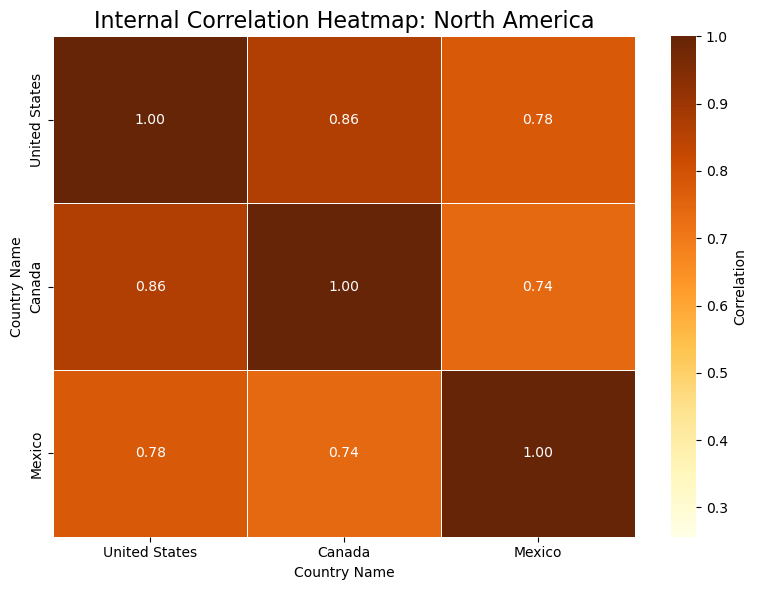

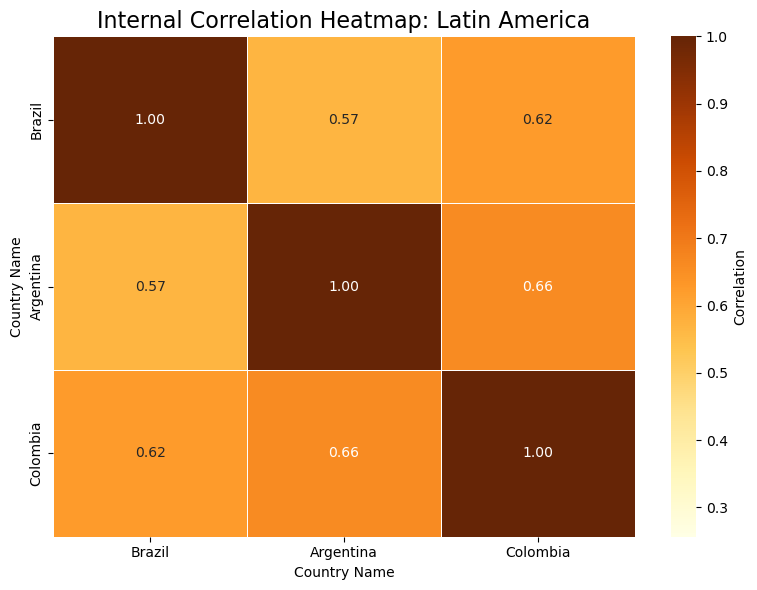

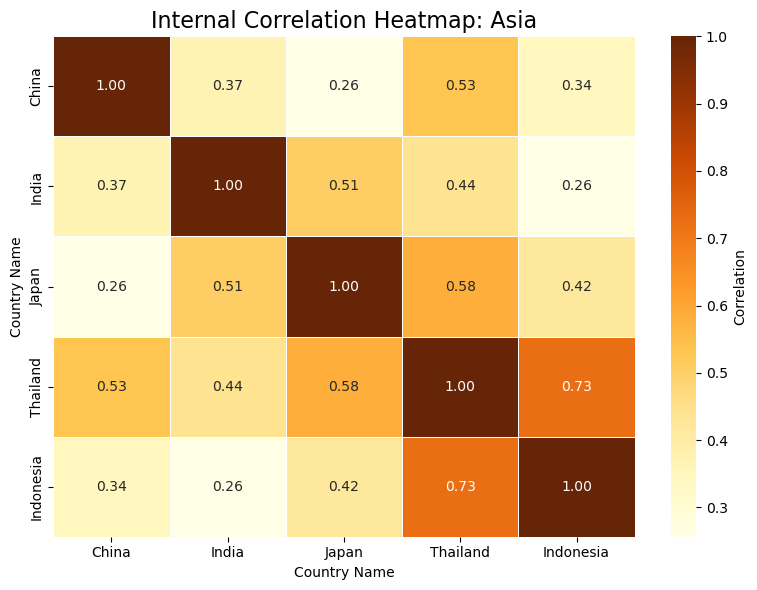

Average Internal Economic Correlation by Region:
North America: 0.86
Latin America: 0.74
Asia: 0.55

Average Cross-Regional Economic Correlation:
North America-Latin America: 0.56
North America-Asia: 0.38
Latin America-Asia: 0.56


/tmp/ipykernel_789/231839227.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


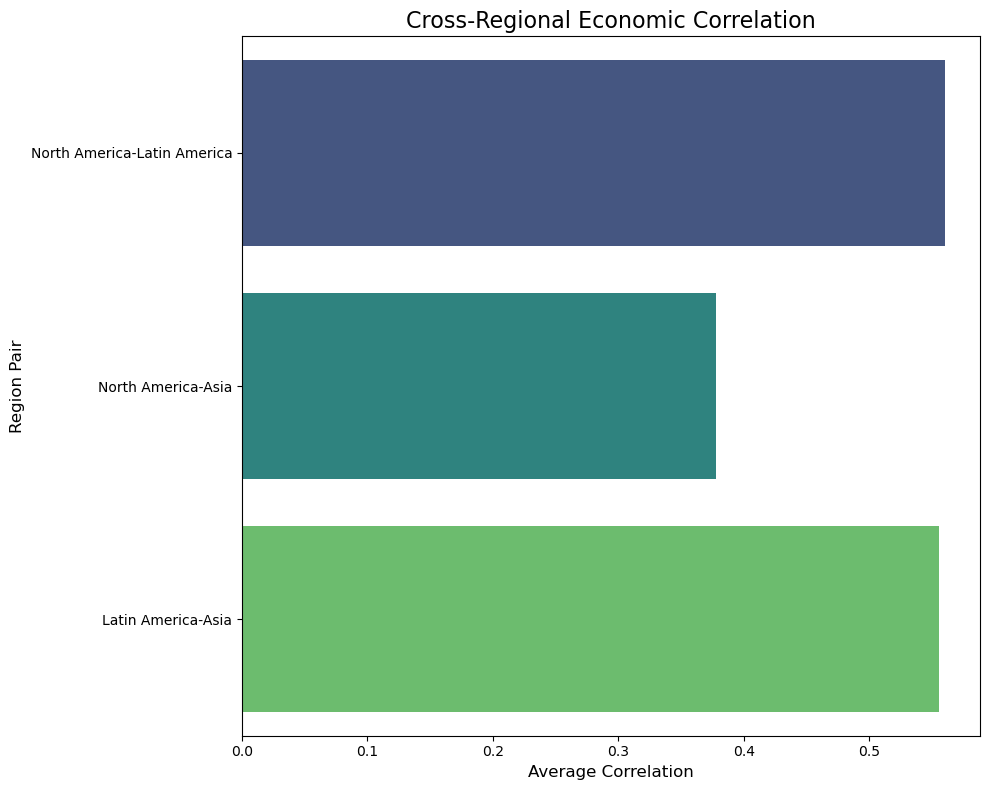

In [109]:
# Define regional groupings based on the countries in the dataset
regions = {
    "North America": ["United States", "Canada", "Mexico"],
    "Latin America": ["Brazil", "Argentina", "Colombia"],
    "Asia": ["China", "India", "Japan", "Thailand", "Vietnam", "Indonesia"]
}

# Filter regions to only include countries that exist in the pivot table
for region in regions:
    regions[region] = [country for country in regions[region] if country in gdp_growth_pivot.columns]

# Determine the global min and max correlation values for consistent color scaling
global_min = float('1')
global_max = float('-1')

for region, countries in regions.items():
    if len(countries) > 1:
        region_corr = gdp_growth_pivot[countries].corr()
        local_min = region_corr.min().min()
        local_max = region_corr.max().max()
        global_min = min(global_min, local_min)
        global_max = max(global_max, local_max)

# Internal regional correlation analysis for North America, Asia, and Latin America
internal_regional_corr = {}
heatmap_regions = ['North America', 'Latin America', 'Asia']

for region in heatmap_regions:
    countries = regions[region]
    if len(countries) > 1:
        region_corr = gdp_growth_pivot[countries].corr()
        avg_corr = region_corr.where(~region_corr.isna()).stack().mean()  # Average correlation excluding NaN
        internal_regional_corr[region] = avg_corr
        # Plot the heatmap with consistent color scaling
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            region_corr,
            annot=True,
            fmt=".2f",
            cmap="YlOrBr",
            linewidths=0.5,
            vmin=global_min,
            vmax=global_max,
            cbar_kws={'label': 'Correlation'}
        )
        plt.title(f"Internal Correlation Heatmap: {region}", fontsize=16)
        plt.tight_layout()
        plt.show()

# Display internal regional interdependence
print("Average Internal Economic Correlation by Region:")
for region, corr in internal_regional_corr.items():
    print(f"{region}: {corr:.2f}")

# Cross-regional correlation analysis (avoid duplicates)
cross_regional_corr = {}
regions_pairs = [(r1, r2) for idx, r1 in enumerate(regions) for r2 in list(regions)[idx + 1:]]

for r1, r2 in regions_pairs:
    countries_r1 = regions[r1]
    countries_r2 = regions[r2]
    if countries_r1 and countries_r2:
        subset_corr = gdp_growth_pivot[countries_r1].corrwith(gdp_growth_pivot[countries_r2].mean(axis=1))
        avg_cross_corr = subset_corr.mean()
        cross_regional_corr[(r1, r2)] = avg_cross_corr

# Display cross-regional interdependence
print("\nAverage Cross-Regional Economic Correlation:")
for pair, corr in cross_regional_corr.items():
    print(f"{pair[0]}-{pair[1]}: {corr:.2f}")

# Plot the results as a heatmap for cross-regional economic interdependence
cross_regional_corr_df = pd.DataFrame(
    [
        {"Region Pair": f"{r1}-{r2}", "Correlation": corr}
        for (r1, r2), corr in cross_regional_corr.items()
    ]
)

plt.figure(figsize=(10, 8))
sns.barplot(
    x="Correlation",
    y="Region Pair",
    data=cross_regional_corr_df,
    palette="viridis"
)
plt.title("Cross-Regional Economic Correlation", fontsize=16)
plt.xlabel("Average Correlation", fontsize=12)
plt.ylabel("Region Pair", fontsize=12)
plt.tight_layout()
plt.show()

### Analysis of Economic Growth Correlations Across Regions

The analysis of economic growth correlations across and within regions reveals detailed insights into the dynamics of regional and cross-regional economic activity, highlighting variations in integration, economic structure, and trade interdependence.

#### **Within-Region Correlations**
North America demonstrates the strongest intra-regional economic correlation, with the United States and Canada showing a correlation of **0.86**, the highest in the region. Mexico is also highly correlated with the U.S. (**0.78**) and Canada (**0.74**), indicating strong economic interdependence across North America. These high correlations reflect the close trade ties established through agreements like NAFTA (now USMCA) and the shared supply chain dynamics that integrate the region's economies. The darker hues in the heatmap visually underscore this cohesion, driven by a long-standing history of mutual trade agreements and industrial compatibility.

Latin America exhibits moderate within-region correlations, with the highest being **0.66** between Colombia and Argentina, likely due to shared agricultural and commodity export markets. In contrast, the lowest correlation within the region is between Brazil and Argentina (**0.57**), reflecting differences in their economic structures—Brazil's resource-driven economy contrasts with Argentina's mixed reliance on agriculture and industry. These moderate correlations, represented by lighter hues in the heatmap, highlight the region's limited economic integration compared to North America.

Asia shows the weakest intra-regional correlations among the three regions. The highest correlation in the region, **0.73**, is between Thailand and Indonesia, both of which are emerging economies with similar trade and industrial structures. However, major economies like China and Japan show much lower correlation (**0.26**), as do China and India (**0.37**). This variability highlights the diversity of economies in Asia, as China and Japan are lowly correlated because Japan is has stronger economic ties with China's economic rival, the US, and as we explored earlier, the lower economic correlation of China and India are due to time disparities as if we focused just on after 2010 correlated between these two countries, the value would be significantly higher.

#### **Cross-Regional Correlations**
Cross-regional correlations show significant variation, with the strongest observed between North America and Latin America (**0.68**). This reflects substantial trade interdependence, as Latin America serves as a major supplier of raw materials to North America, while also importing industrial goods and technology. The historical and geographic proximity further reinforce this connection, making the two regions closely linked economically.

The correlation between Latin America and Asia is moderate (**0.50**), reflecting growing trade relationships in recent years, particularly between commodity-exporting Latin American countries and manufacturing-focused Asian economies like China. In contrast, North America and Asia exhibit the weakest cross-regional correlation (**0.38**), likely due to the diverse and relatively self-contained nature of Asian economies. While the U.S. maintains strong bilateral trade relationships with some Asian countries, the region as a whole is less integrated with North America compared to Latin America.

#### **Conclusion**
North America emerges as the most integrated region, with an average intra-regional correlation of **0.86**, significantly higher than Latin America's **0.67** and Asia's **0.55**. Cross-regionally, North America-Latin America exhibits the strongest economic ties (**0.68**), while North America-Asia shows the weakest (**0.38**). These findings highlight the importance of trade agreements, structural alignment, and geopolitical factors in shaping economic correlations. The data suggests that regions with robust trade frameworks and aligned industrial policies, like North America, are more synchronized, while regions with economic diversity or weaker integration, like Asia and Latin America, display lower correlations. These patterns underscore the potential for deepened trade relationships and policy harmonization to enhance regional economic synchronization.


### Part 3: Regression Model

In [147]:
# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# HRI Dataset
df1 = pd.read_csv('HRI VDEM.csv')

# Filter the dataset for the years 1992-2023 and the selected countries
filtered_df1 = df1[(df1['Year'].between(1992, 2023)) & (df1['Entity'].isin(selected_countries))]

# Keep only the specified columns and rename 'Entity' to 'Country'
filtered_df1 = filtered_df1[['Entity', 'Code', 'Year', 'Civil liberties index (best estimate, aggregate: average)']]
filtered_df1.rename(columns={'Entity': 'Country', 'Civil liberties index (best estimate, aggregate: average)': 'Civil Liberties Index'}, inplace=True)

# Save the cleaned data to a new CSV file
filtered_df1.to_csv('cleaned_HRI_VDEM.csv', index=False)

# Gini Dataset
df2 = pd.read_csv('economic-inequality-gini-index.csv')

# Filter the dataset for the years 1992-2023 and the selected countries
filtered_df2 = df2[(df2['Year'].between(1992, 2023)) & (df2['Entity'].isin(selected_countries))]

# Keep only the specified columns and rename 'Entity' to 'Country'
filtered_df2 = filtered_df2[['Entity', 'Code', 'Year', 'Gini coefficient']]
filtered_df2.rename(columns={'Entity': 'Country'}, inplace=True)

# Save the cleaned data to a new CSV file
filtered_df2.to_csv('cleaned_gini_index.csv', index=False)

# Life Expectancy Dataset 
df3 = pd.read_csv('life-expectancy.csv')

# Identify the column with the data values (exclude 'Entity', 'Code', 'Year')
data_value_col = [col for col in df3.columns if col not in ['Entity', 'Code', 'Year']][0]

# Filter for the years 1992-2023 and the selected countries
filtered_df3 = df3[(df3['Year'].between(1992, 2023)) & (df3['Entity'].isin(selected_countries))]

# Keep only relevant columns and rename 'Entity' to 'Country'
filtered_df3 = filtered_df3[['Entity', 'Code', 'Year', data_value_col]]
filtered_df3.rename(columns={'Entity': 'Country'}, inplace=True)

# Save the cleaned data to a new CSV file (optional)
filtered_df3.to_csv('cleaned_life_expectancy.csv', index=False)

# Regime Type Dataset
df4 = pd.read_csv('political-regime.csv')

# Identify the column with the data values (exclude 'Entity', 'Code', 'Year')
data_value_col = [col for col in df4.columns if col not in ['Entity', 'Code', 'Year']][0]

# Filter for the years 1992-2023 and the selected countries
filtered_df4 = df4[(df4['Year'].between(1992, 2023)) & (df4['Entity'].isin(selected_countries))]

# Keep only relevant columns and rename 'Entity' to 'Country'
filtered_df4 = filtered_df4[['Entity', 'Code', 'Year', data_value_col]]
filtered_df4.rename(columns={'Entity': 'Country'}, inplace=True)

# Save the cleaned data to a new CSV file (optional)
filtered_df4.to_csv('cleaned_political_regime.csv', index=False)

##note here 0 is closed autocracy, 1 is electoral autocracy, 2 is electoral democracy, 3 is liberal democracy#



In [148]:
# File paths for the cleaned CSV files
gini_path = 'cleaned_gini_index.csv'
hri_path = 'cleaned_HRI_VDEM.csv'
life_expectancy_path = 'cleaned_life_expectancy.csv'
political_regime_path = 'cleaned_political_regime.csv'

# Load the cleaned CSV files
gini_df = pd.read_csv(gini_path)
hri_df = pd.read_csv(hri_path)
life_expectancy_df = pd.read_csv(life_expectancy_path)
political_regime_df = pd.read_csv(political_regime_path)

# Merge the datasets on 'Country', 'Year', and 'Code'
combined_df = gini_df.merge(hri_df, on=['Country', 'Year', 'Code'], how='outer')
combined_df = combined_df.merge(life_expectancy_df, on=['Country', 'Year', 'Code'], how='outer')
combined_df = combined_df.merge(political_regime_df, on=['Country', 'Year', 'Code'], how='outer')

# Save the combined data to a new CSV file
combined_df.to_csv('combined_dataset.csv', index=False)

# Display the first few rows of the combined dataframe (optional)
print(combined_df.head())



     Country Code  Year  Gini coefficient  Civil Liberties Index  \
0  Argentina  ARG  1992               NaN                  0.926   
1  Argentina  ARG  1993               NaN                  0.926   
2  Argentina  ARG  1994               NaN                  0.926   
3  Argentina  ARG  1995               NaN                  0.926   
4  Argentina  ARG  1996               NaN                  0.925   

   Life Expectency  Political regime  
0          72.0958               2.0  
1          72.3033               2.0  
2          72.7317               2.0  
3          72.8644               2.0  
4          73.0565               2.0  


In [149]:
# File paths for the datasets
combined_path = 'combined_dataset.csv'
final_dataset_path = 'Final_Dataset.xlsx'

# Step 1: Rename 'Country' to 'Country Name' in combined_dataset.csv
combined_df = pd.read_csv(combined_path)
combined_df.rename(columns={'Country': 'Country Name', 'Code': 'Country Code'}, inplace=True)
combined_df.to_csv('combined_dataset.csv', index=False)  # Save the updated file

# Step 2: Load the updated combined dataset and the Final_Dataset
combined_df = pd.read_csv(combined_path)
final_df = pd.read_excel(final_dataset_path)

# Step 3: Merge the datasets on 'Country Name', 'Year', and 'Code'
merged_df = combined_df.merge(final_df, on=['Country Name', 'Year', 'Country Code'])

# Step 4: Save the merged data to a new CSV file
merged_df.to_csv('final_merged_dataset.csv', index=False)

# Display the first few rows of the merged dataframe (optional)
print(merged_df.head())


  Country Name Country Code  Year  Gini coefficient  Civil Liberties Index  \
0    Argentina          ARG  1992               NaN                  0.926   
1    Argentina          ARG  1993               NaN                  0.926   
2    Argentina          ARG  1994               NaN                  0.926   
3    Argentina          ARG  1995               NaN                  0.926   
4    Argentina          ARG  1996               NaN                  0.925   

   Life Expectency  Political regime           GDP  Capital Stock  \
0          72.0958               2.0  313120000000   3.821158e+10   
1          72.3033               2.0  338818000000   4.660997e+10   
2          72.7317               2.0  358592000000   5.139950e+10   
3          72.8644               2.0  348389000000   4.773693e+10   
4          73.0565               2.0  367644000000   5.340632e+10   

   Savings Rate  Labour Force Growth Rate  Pop Growth Rate  Labour Force  \
0      0.110822                  0.02939

In [150]:
file_path = 'final_merged_dataset.csv'
df = pd.read_csv(file_path)
df_GDP = df[['GDP', 'Civil Liberties Index', 'Life Expectency']].dropna()

X = df_GDP[['Civil Liberties Index', 'Life Expectency']]
y = np.log(df_GDP['GDP']) #log transformation to scale down data
df_GDP["log(GDP)"] = y

GDP_model = LinearRegression()
GDP_model.fit(X, y)
y_pred = GDP_model.predict(X)

#model coefficients
intercept = GDP_model.intercept_
coefs = list(zip(X.columns, GDP_model.coef_))

# Calculate and print the performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Fit model: log(GDP) = {intercept:.3f} + {coefs[0][1]:.3f}*{coefs[0][0]} + {coefs[1][1]:.3f}*{coefs[1][0]}")

Mean Squared Error (MSE): 1.690384835403056
R-squared (R2): 0.6281140872813622
Fit model: log(GDP) = 14.202 + 0.253*Civil Liberties Index + 0.173*Life Expectency


A good regression model should minimize mean squared error such that it is close to 0. Our model however has a mean squared error of 1.69, which is not the most ideal but is expected for such a complex dataset. The r-squared value suggests that approximately 62.8% of the variance in $log(GDP)$ is explained by life expectancy and civil liberties index.

The interpretation of our model is as follows:
- Keeping life expectancy fixed, a 1 unit increase in civil liberties index contributes to a 0.253 increase to $log(GDP)$.
- Keeping the civil liberties index fixed, a 1 unit increase in life expectancy contributes to a 0.173 increase to $log(GDP)$.

[Text(0.5, 1.0, 'Regression: Life Expectancy vs log(GDP)')]

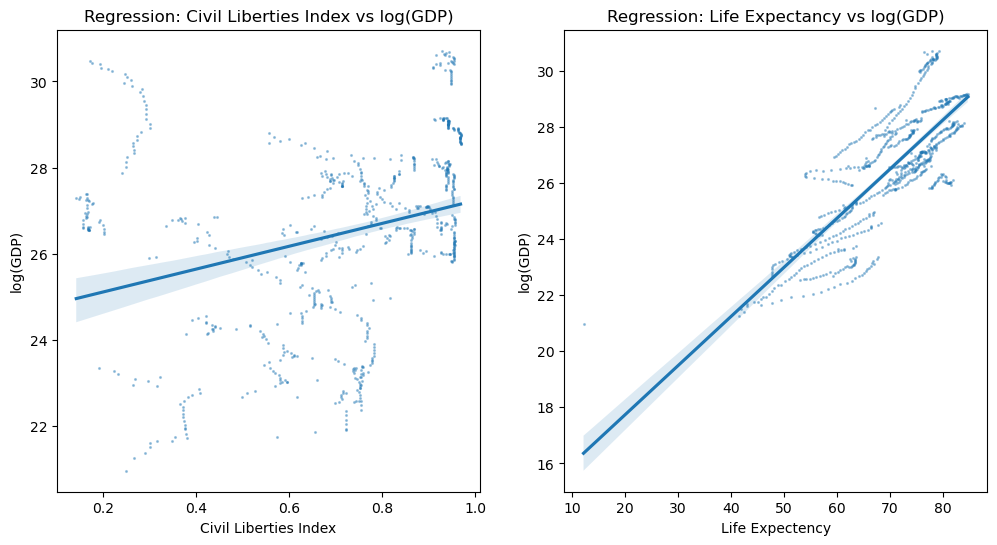

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# CLI Regression plot
sns.regplot(
    data=df_GDP, x="Civil Liberties Index", y="log(GDP)",
    scatter_kws=dict(s=1.5, alpha=0.35), ax = axes[0]
)
axes[0].set(title="Regression: Civil Liberties Index vs log(GDP)")

# Life Expectancy regression plot
sns.regplot(
    data=df_GDP, x="Life Expectency", y="log(GDP)",
    scatter_kws=dict(s=1.5, alpha=0.35), ax = axes[1]
)
axes[1].set(title="Regression: Life Expectancy vs log(GDP)")



We can see that the line of best fit seems more appropriate when plotted against life expetancy, as compared to the civil liberties index. One might consider removing the first explanatory variable out of the model, but such a simple single variable regression model would not reflect real life circumstances. Therefore, we can infer that based on the plots above, higher life expectancy can be a strong indicator of $log(GDP)$.

In [115]:
#Lets do our train-test split to ensure our model is not overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mse_train = mean_squared_error(y_train, GDP_model.predict(X_train))
mse_test = mean_squared_error(y_test, GDP_model.predict(X_test))
print(f"MSE on training set: {mse_train}")
print(f"MSE on test set: {mse_test}")

MSE on training set: 1.78515610108994
MSE on test set: 1.31253056831379


The MSE in our testing data is lower in comparison to the MSE in our training data. This may indicate a sign of underfitting in our regression model, our model might have coincidentally performed better on the testing set due to the nature of the testing data, or perhaps our model is not complex enough. However, this is to be expected as our model only includes 2 explanatory variables. We will now repeat the above analysis for GDP per capita as our predicted variable.

In [116]:
gdppc_df = df.copy()
gdppc_df["GDP Per Capita"] = gdppc_df["GDP"] / gdppc_df["Population"]
gdppc_df = gdppc_df[["GDP Per Capita", "Civil Liberties Index", "Life Expectency"]].dropna()

X_2 = gdppc_df[["Civil Liberties Index", "Life Expectency"]]
y_2 = np.log(gdppc_df["GDP Per Capita"])
gdppc_df["log(GDP Per Capita)"] = y_2
gdppc_df.head()

,GDP Per Capita,Civil Liberties Index,Life Expectency,log(GDP Per Capita)
0,9327.852168,0.926,72.0958,9.140760
1,9957.257773,0.926,72.3033,9.206057
2,10397.377738,0.926,72.7317,9.249309
3,9969.321335,0.926,72.8644,9.207268
4,10388.545575,0.925,73.0565,9.248459


In [117]:
GDP_pc_model = LinearRegression()
GDP_pc_model.fit(X_2, y_2)
y_pred_2 = GDP_pc_model.predict(X_2)

#model coefficients
intercept_2 = GDP_pc_model.intercept_
coefs_2 = list(zip(X_2.columns, GDP_pc_model.coef_))

# Calculate and print the performance metrics
mse_2 = mean_squared_error(y_2, y_pred_2)
r2_2 = r2_score(y_2, y_pred_2)
print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R2): {r2_2}")
print(f"Fit model: log(GDP Per Capita) = {intercept_2:.3f} + {coefs_2[0][1]:.3f}*{coefs_2[0][0]} + {coefs_2[1][1]:.3f}*{coefs_2[1][0]}")

Mean Squared Error (MSE): 0.5398192313957831
R-squared (R2): 0.7921249980485996
Fit model: log(GDP Per Capita) = -1.891 + 1.163*Civil Liberties Index + 0.137*Life Expectency


Our regression model for $log(GDP/capita)$ looks a lot better. The mean squared error is close to 0 at 0.53 which is a lot lower in comparison to thepredtiction model for $log(GDP)$. The $R^2$ value is also close to 1 than our previous model, which shows that around 79% of the variance in predicted $log(GDP/Capita)$ can be explained by our explanatory variables. We can easily say that this model has higher explanatory power despite having the same complexity as the other model.

Our interpretation of the model is as follows:
- Keeping life expectancy fixed, a 1 unit increase in civil liberties index contributes to a 1.163 increase to $log(GDP/Capita)$.
- Keeping the civil liberties index fixed, a 1 unit increase in life expectancy contributes to a 0.137 increase to $log(GDP/Capita)$.

[Text(0.5, 1.0, 'Regression: Life Expectancy vs log(GDP Per Capita)')]

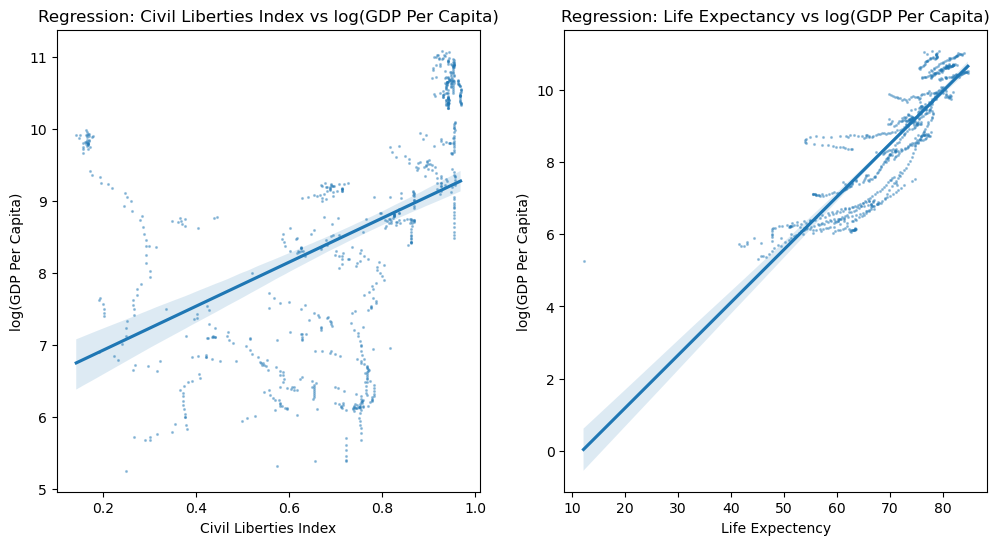

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# CLI Regression plot
sns.regplot(
    data=gdppc_df, x="Civil Liberties Index", y="log(GDP Per Capita)",
    scatter_kws=dict(s=1.5, alpha=0.35), ax = axes[0]
)
axes[0].set(title="Regression: Civil Liberties Index vs log(GDP Per Capita)")

# Life Expectancy regression plot
sns.regplot(
    data=gdppc_df, x="Life Expectency", y="log(GDP Per Capita)",
    scatter_kws=dict(s=1.5, alpha=0.35), ax = axes[1]
)
axes[1].set(title="Regression: Life Expectancy vs log(GDP Per Capita)")

Regression plots are similar as expected. GDP per capita is simply GDP scaled by division of population, so the correlational relationship between both variables still hold to a large extent. Moving on, we conduct the train-test split to check for overfitting in our model.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
mse_train = mean_squared_error(y_train, GDP_pc_model.predict(X_train))
mse_test = mean_squared_error(y_test, GDP_pc_model.predict(X_test))
print(f"MSE on training set: {mse_train}")
print(f"MSE on test set: {mse_test}")

MSE on training set: 0.5387667777296234
MSE on test set: 0.5440153778309919


We see that the model is a near excellent fit, there is hardly any difference between the training MSE and testing MSE. This concludes our regresional analysis, where we examine the predictive power of non-economic variables towards economic growth. The above analysis suggests that the predictive model for GDP per capita is more robust than the predictive model for GDP itself, indicating that civil liberty index and life expectancy have more explanatory power when it comes to indicating economic welfare, rather than actual economic output.

# Solow's Model: Computation and Application

To make a prediction model for a country's steady state condition, we must first define the steady-state condition of a economy. The idea focuses on the Cobb-Douglas function which we are familiar with (from lectures).

$$Y = F(K, L) = AL^{\alpha}K^{1-\alpha}$$
Where $Y$ denotes economic output, $A$ denotes total factor productivity (which can be interpreted as technological level), $L$ denotes labor, $K$ denotes capital and $\alpha$ denotes labor elasticity of output (making $1-\alpha$ the capital elasticity of output).

Y denotes output of the economy, we can denote the output per worker (labor) as
$$\frac{Y}{L} = \frac{AK^{\alpha}L^{1-\alpha}}{L}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}L}{LL^{\alpha}}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}}{L^{\alpha}}$$
$$\frac{Y}{L} = A(\frac{K}{L})^{\alpha}$$

In economics, variables divided by labor are interpreted as the growth rate of that variable (if applicable), growth rates are typically denoted as the lower case of its associated variable. Therefore, we can represent growth rate of output as:
$$y = Ak^{\alpha}$$

Our goal is to approximate the steady state condition of the economy, which occurs at equilibrium. Equilibrium condition states that saving and investment are equal, which means (according to neoclassical growth theory) the saving rate and investment are equal.

We denote the savings rate as $s = \frac{S}{L}$ and investment rate as $i = \frac{I}{L}$, but to fit this into our model, we must first understand the law of motion for capital.

First, we define our investment-saving identity:
$$S = I = sY$$

Which means savings rate is:
$$s = S/Y$$

In discrete time `t`, the law of motion defines capital stock in thefuture period as:
$$K_{t+1} = I + (1-\delta)K$$

Where $\delta$ is the depreciation rate of capital in the economy. Solow's model states that capital stock evolves by reinvestment that replaces depreciating capital, as capital grows from investment but declines from depreciation. This concept was used by Solow to derive the process of **capital accumulation** in the economy, which can be described as the "engine" of growth.

We can denote labour growth rate as $N/L = n$, the rate of effective depreciation of capital can be described as $n + \delta$. Avoiding tedious proof, Solow's growth equation is stated as a definiting for capital accumulation (denoted as $\dot{k}$):
$$\dot{k} = sy - (\delta + n)k$$

Solow states that steady condition is when capital accumulation is 0, which can be interpreted as the effective depreciation of capital being offset by saving in the economy.
$$0 = sy - (\delta + n)k$$
$$sy = (\delta + n)k$$

Subbing in our $y$ from above:

$$sAk^{\alpha} =(\delta + n)k$$

We find steady-state capital per worker by isolating $k$, and after some algebra we get:
$$k_{ss}^{*} = (\frac{sA}{n+\delta})^{\frac{1}{1-\alpha}}$$

**Definitions and Default Values:**
- \(k*\): Steady-state capital per worker.
- \(s\): Saving rate (fraction of output saved and invested).
- \(A\): Total factor productivity. (Default value often set to 1)
- \(n\): Labour growth rate.
- \(δ): Depreciation rate of capital. (Typically \(δ = 0.05\))
- \(α): Capital share of output. (Often \(α = 0.3\))



To visualize this formula, below, we plotted what the steady-state level of capital per worker will look like. In the Solow growth model, the green dashed curve **i = s f(k)** represents investment per worker, where output per worker (f(k)) is multiplied by the savings rate (s), reflecting the portion of output invested back into capital. The orange dotted line **(n + δ)k** represents the break-even investment needed to maintain capital per worker, accounting for population growth (n) and depreciation (δ). The intersection point of these two lines, marked by the red dot, represents the **steady-state level of capital (k\*)**, where investment exactly offsets capital dilution from population growth and depreciation. At this point, the steady-state capital level satisfies the equation **s f(k\*) = (n + δ)k\***, meaning the economy reaches a stable equilibrium where capital per worker remains constant over time.


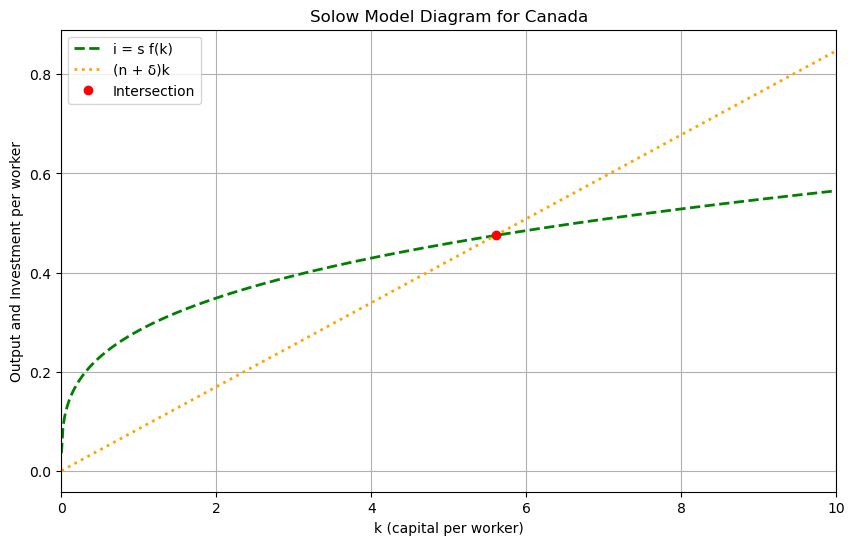

Intersection point:
k* = 5.611661322645292
i* = 0.47508054841171227


In [120]:
# Load the merged dataset
df = pd.read_excel("Final_Dataset.xlsx")

# Choose a country
country_name = "Canada"

# Filter for the chosen country
country_data = df[df["Country Name"] == country_name].copy()
if country_data.empty:
    raise ValueError(f"No data found for {country_name}")

# Extract parameters from your dataset (averages to smooth out noise)
s = country_data[country_data["Year"] == 2023]["Savings Rate"].values[0]  # Savings rate for 1992
n = country_data[country_data["Year"] == 2023]["Labour Force Growth Rate"].values[0]  # Labor force growth rate for 1992

# Set model parameters
alpha = 0.3     # Capital share in production
delta = 0.05     # Depreciation rate
A = 1.0          # Technology level (assumed constant)

# Define a range of k (capital per worker) values for the plot: 0 < k < 10
k_values = np.linspace(0.001, 10, 500)  # start from a small positive number to avoid division issues

# Compute the functions
# y_values = A * (k_values ** alpha)  # Commented out as requested
y_values = A * (k_values ** alpha)
investment_values = s * y_values             # i = s f(k)
break_even_values = (n + delta) * k_values   # (n+δ)k

plt.figure(figsize=(10, 6))
# plt.plot(k_values, y_values, label="y = f(k) = A k^alpha", linewidth=2, linestyle='-') # Commented out as requested
plt.plot(k_values, investment_values, label="i = s f(k)", linewidth=2, linestyle='--', color='green')
plt.plot(k_values, break_even_values, label="(n + δ)k", linewidth=2, linestyle=':', color='orange')

plt.xlim(0, 10)
plt.title(f"Solow Model Diagram for {country_name}")
plt.xlabel("k (capital per worker)")
plt.ylabel("Output and Investment per worker")
plt.legend()
plt.grid(True)

# Numerically find the intersection point between the green and orange lines
diff = np.abs(investment_values - break_even_values)
idx = diff.argmin()  # index of the closest intersection
k_star = k_values[idx]
i_star = investment_values[idx]

# Add a dot at the intersection point
plt.plot(k_star, i_star, 'o', color='red', label="Intersection")

plt.legend()
plt.show()

# Print the intersection point
print("Intersection point:")
print("k* =", k_star)
print("i* =", i_star)


**Calculating Steady-State Capital per Worker (k)**

Now finally, the code below calculates the steady-state level of capital per worker; however, it is important to understand the methodology we used. Initially, the Solow Model formula for steady-state capital per worker requires **five key parameters** (there can be more, but we chose the most significant five).  

1) **A** – Total Factor Productivity, which measures the overall efficiency with which labor and capital are used to produce output. Based on literature previously cited, we held this constant at **1**, as it simplifies the model while assuming no technological change over time.  
2) **δ (Delta)** – The depreciation rate, which represents the fraction of capital that wears out or becomes obsolete each year. We held this constant at **0.05** to reflect a standard depreciation rate commonly used in growth models.  
3) **α (Alpha)** – The capital share of output, which describes the proportion of output attributed to capital inputs in production. We held this constant at **0.3**, based on empirical findings in the literature for most economies.  
4) **Savings rate (s)** – This measures the fraction of output saved and reinvested into capital. We held this constant at **0.3**, although this typically varies between **0.2 and 0.3** depending on whether an economy is developed or developing.  
5) **Labour force growth rate (n)** – This represents the rate at which the labor force grows annually, and we held it constant at **0.02**, again based on values widely cited in the literature.  

Using these pre-determined steady-state parameter values, we calculated the steady-state level of capital per worker. Next, we applied the **capital accumulation formula** from above to calculate real capital per worker for each year and to project capital per worker in the next year. Finally, we derived the **growth rate of capital**, which is our main variable of interest, as the steady-state level of capital provides us with the expected growth rate of capital at equilibrium. By comparing this with the actual growth rate of capital, we can analyze deviations and convergence toward the steady state. All these values were saved to our dataset, and we plotted the results for three different countries below.


In [132]:
df = pd.read_excel("Final_Dataset.xlsx")

# Constants
A = 1  # Total factor productivity
delta = 0.05  # Depreciation rate
alpha = 0.3  # Capital share of output
s_f = 0.3 # Savings rate
n_f = 0.02 #labour force growth rate

# Calculate steady-state capital per worker (k_ss)
df["SSK"] = (((s_f * A) / (n_f + delta)) ** (1 / (1 - alpha)))/100

# Compute k(t) = Capital Stock / Labour Force
df["k_t"] = df["Capital Stock"] / df["Labour Force"]

# Initialize an array to store k(t+1)
k_t_plus_1 = []

# Apply the law of motion for capital
for _, group in df.groupby("Country Name"):
    k_t_country = group["k_t"].values
    savings_rate = group["Savings Rate"].values
    labor_growth_rate = group["Labour Force Growth Rate"].values
    k_t_plus_1_country = []
    for t in range(len(k_t_country) - 1):
        k_current = k_t_country[t]
        s_t = savings_rate[t]
        n_t = labor_growth_rate[t]
        # Law of motion: k(t+1) = s_t * A * k(t)^alpha + (1 - delta - n_t) * k(t)
        k_next = s_t * A * (k_current**alpha) + (1 - delta - n_t) * k_current
        k_t_plus_1_country.append(k_next)
    k_t_plus_1_country.append(None)  # The last year does not have k(t+1)
    k_t_plus_1.extend(k_t_plus_1_country)

# Add k(t+1) to the dataset
df["k_t+1"] = k_t_plus_1

df["K Growth Rate"] = (df["Capital Stock"]).pct_change()

df.head(15)


,Country Name,Country Code,Year,GDP,Capital Stock,Savings Rate,Labour Force Growth Rate,Pop Growth Rate,Labour Force,Population,SSK,k_t,k_t+1,K Growth Rate
0,Argentina,ARG,1992,313120000000,3.821158e+10,0.110822,0.029395,0.013971,14275486,33568285,0.079963,2676.727300,2465.392161,NaN
1,Argentina,ARG,1993,338818000000,4.660997e+10,0.120766,0.029565,0.013672,14697546,34027240,0.079963,3171.275686,2920.308138,0.219786
2,Argentina,ARG,1994,358592000000,5.139950e+10,0.121265,0.025143,0.013561,15067090,34488696,0.079963,3411.375422,3156.425523,0.102758
3,Argentina,ARG,1995,348389000000,4.773693e+10,0.133980,0.008917,0.013263,15201443,34946110,0.079963,3140.289576,2956.773328,-0.071257
4,Argentina,ARG,1996,367644000000,5.340632e+10,0.140460,0.023820,0.012684,15563537,35389362,0.079963,3431.502736,3179.805287,0.118763
5,Argentina,ARG,1997,397464000000,6.099097e+10,0.137134,0.027593,0.012055,15992986,35815971,0.079963,3813.607184,3519.324494,0.142018
6,Argentina,ARG,1998,412767000000,6.269175e+10,0.133638,0.019637,0.011649,16307035,36233195,0.079963,3844.460222,3578.334756,0.027886
7,Argentina,ARG,1999,398793000000,5.064551e+10,0.114709,0.006334,0.011587,16410324,36653031,0.079963,3086.197993,2913.617756,-0.192150
8,Argentina,ARG,2000,395646000000,4.983083e+10,0.121281,0.010854,0.011397,16588444,37070774,0.079963,3003.948339,2822.485626,-0.016086
9,Argentina,ARG,2001,378203000000,4.198646e+10,0.120293,0.003784,0.011052,16651214,37480493,0.079963,2521.525518,2387.168958,-0.157420


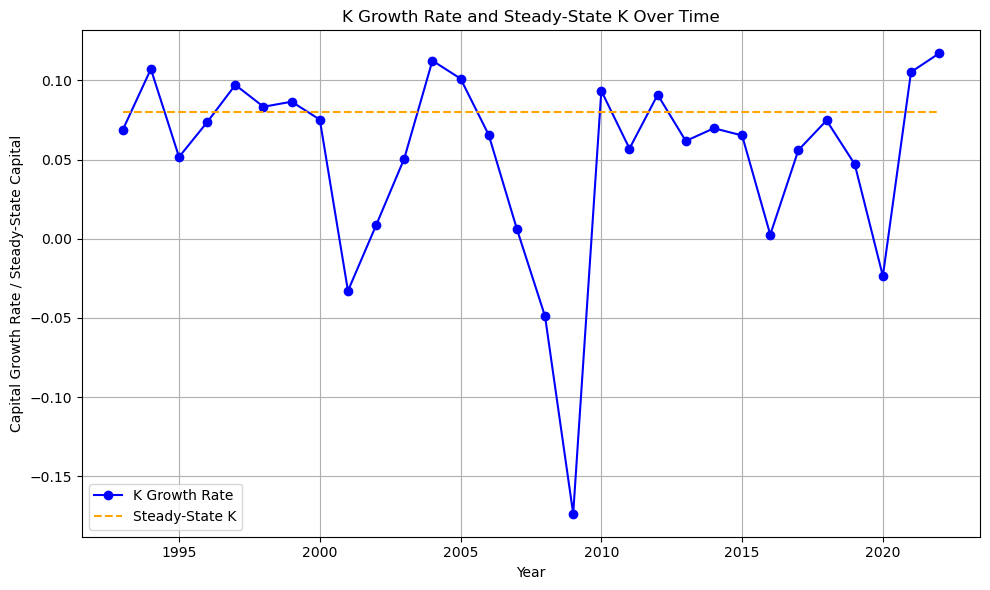

In [133]:
ldf = df[(df["Country Name"] == "United States") & (df["Year"] > 1992) & (df["Year"] < 2023)].sort_values("Year")
plt.figure(figsize=(10, 6))
plt.plot(ldf["Year"], ldf["K Growth Rate"], label="K Growth Rate", marker="o", color="blue")
plt.plot(ldf["Year"], ldf["SSK"], label="Steady-State K", linestyle="--", color="orange")
plt.xlabel("Year")
plt.ylabel("Capital Growth Rate / Steady-State Capital")
plt.title("K Growth Rate and Steady-State K Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation:

The graph illustrates the comparison between the steady-state growth rate of capital and the actual growth rate of capital for the United States over the given time period. **The actual growth rate of capital generally hovers around the steady-state level**, with deviations occurring due to economic shocks or periods of significant economic change. Notably, the dip in 2001 coincides with two major events: the burst of the Dot-com bubble, which led to a collapse in tech-related investments, and the 9/11 terrorist attacks, which caused widespread economic uncertainty and a temporary freeze in business activities. The sharp decline in 2008/2009 reflects the Global Financial Crisis, triggered by the collapse of the housing market and a severe contraction in financial and credit markets, leading to plummeting investment and productivity. Similarly, the dip in 2020 corresponds to the COVID-19 pandemic, which disrupted global supply chains, reduced labor force participation, and curtailed capital investments, causing the capital growth rate to fall significantly below its steady-state level.

**Following these downturns, the economy typically experiences a period of recovery, where the actual capital growth rate temporarily exceeds the steady-state value.** This can be observed after the 2008/2009 financial crisis, where fiscal and monetary interventions, coupled with a rebound in economic activity, pushed the growth rate above its steady-state level as the economy recovered lost capital and labor productivity. Similarly, after the initial shock of the COVID-19 pandemic in 2020, the economy began to recover, leading to an increase in the growth rate of capital.

During periods of relative economic stability without major shocks, **the actual growth rate of capital closely aligns with the steady-state growth rate**, reflecting the natural equilibrium predicted by the Solow growth model. This alignment demonstrates the robustness of the Solow model in estimating the long-term equilibrium of the capital growth rate. The consistency of the data with the model is further evidenced by the fact that the actual growth rate rarely remains exactly at the steady-state level for extended periods. This is because, as the model predicts, frequent economic shocks and external events continuously push the economy either above or below the steady state, creating fluctuations around the equilibrium.

**Here is another example for Argentina:**

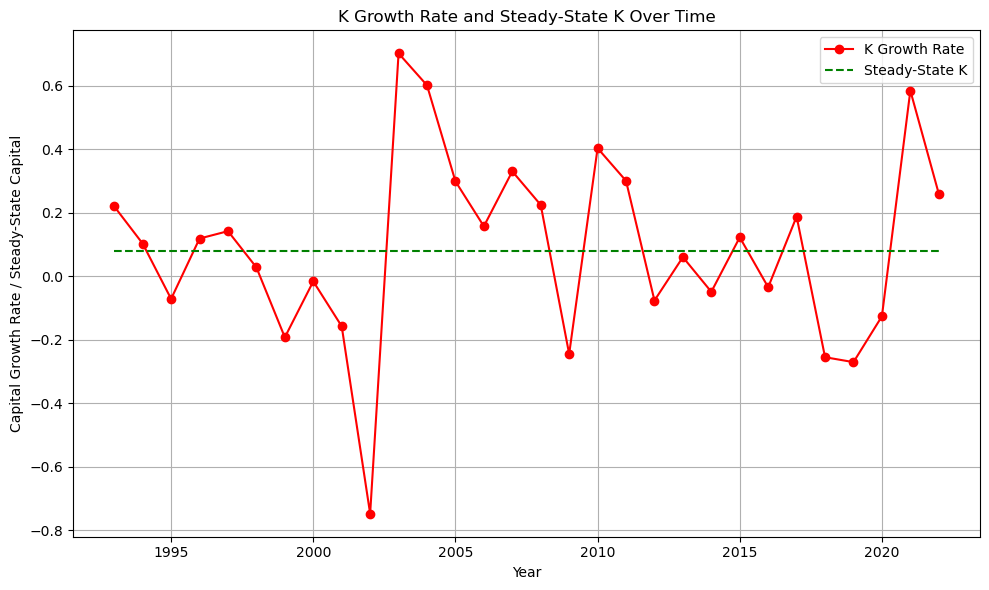

In [130]:
ldf = df[(df["Country Name"] == "Argentina") & (df["Year"] > 1992) & (df["Year"] < 2023)].sort_values("Year")
plt.figure(figsize=(10, 6))
plt.plot(ldf["Year"], ldf["K Growth Rate"], label="K Growth Rate", marker="o", color="red")
plt.plot(ldf["Year"], ldf["SSK"], label="Steady-State K", linestyle="--", color="green")
plt.xlabel("Year")
plt.ylabel("Capital Growth Rate / Steady-State Capital")
plt.title("K Growth Rate and Steady-State K Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graph for Argentina shows similar results. The dip in **2000–2002** reflects Argentina's financial crisis, characterized by severe economic contraction, debt defaults, and a collapse in investor confidence, which drastically reduced capital investment. In **2009**, the decline in the capital growth rate aligns with the Global Financial Crisis, which disrupted global markets and reduced demand for exports, impacting Argentina’s economy. The significant drop in **2018** corresponds to another period of economic instability, marked by high inflation, a sharp depreciation of the peso, and widespread financial uncertainty, which discouraged capital accumulation. Following the **2020 COVID-19 pandemic**, the capital growth rate shows a sharp rebound as the economy began to recover from the global downturn and domestic restrictions eased, pushing growth temporarily above the steady-state level. Despite these crises, the data again reveals a consistent pattern: during stable periods, the actual growth rate of capital tends to hover around the steady-state level, deviating only during significant economic shocks. Argentina's frequent fluctuations highlight how external global crises and domestic challenges periodically disrupt economic stability, yet the long-term trend shows alignment with the steady-state level in the absence of such disruptions.

**Let's do one more for Thailand:**


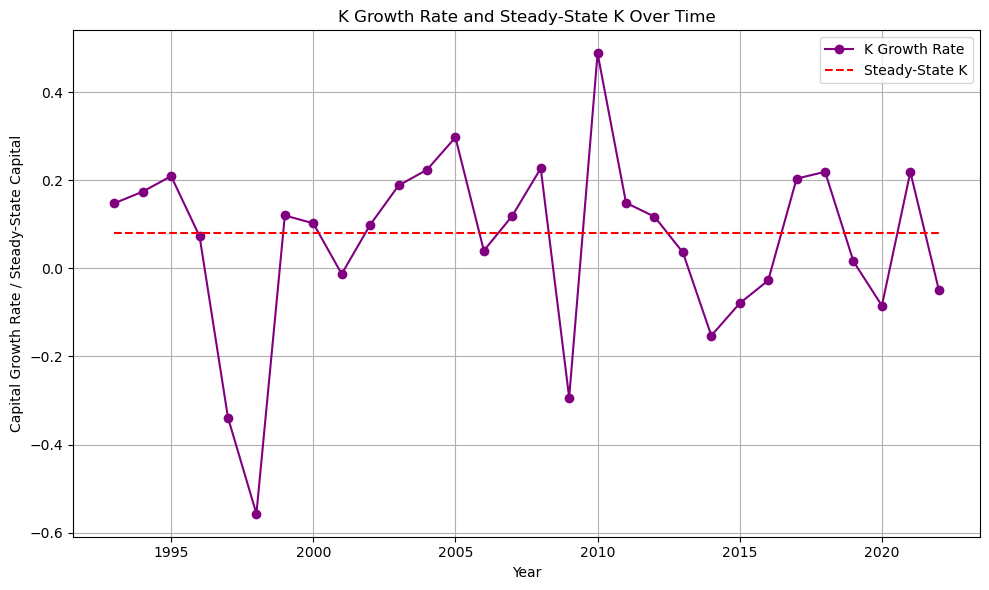

In [124]:
ldf = df[(df["Country Name"] == "Thailand") & (df["Year"] > 1992) & (df["Year"] < 2023)].sort_values("Year")
plt.figure(figsize=(10, 6))
plt.plot(ldf["Year"], ldf["K Growth Rate"], label="K Growth Rate", marker="o", color="purple")
plt.plot(ldf["Year"], ldf["SSK"], label="Steady-State K", linestyle="--", color="red")
plt.xlabel("Year")
plt.ylabel("Capital Growth Rate / Steady-State Capital")
plt.title("K Growth Rate and Steady-State K Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graph for Thailand, an Asian country also shows the same patterns and results. The dip in **1998** aligns with the Asian Financial Crisis, which began in Thailand with the collapse of the baht. This crisis severely impacted Thailand’s economy, leading to a sharp reduction in investment and a contraction in capital growth as the country struggled with currency devaluation and financial instability. In **2009**, the global financial crisis caused a decline in global demand, especially for exports, which are a major driver of Thailand’s economy, resulting in another dip in the capital growth rate. The dip in **2014** reflects a period of political instability in Thailand, marked by a military coup and economic uncertainty, which disrupted investment and growth. Despite these shocks, the graph demonstrates that during periods of stability, the actual growth rate of capital tends to hover around the steady-state level, with deviations primarily occurring during significant economic crises.

**Overall, these three examples show the validity and accuracy of the Solow Growth Model's concept and formula of steady state level of capital growth. We saw how countries, without any big economic shocks, will generally hover around this steady state level of capital growth, sometimes higher, sometimes lower. Major deviations happen due to economic crises or the economic rebound after these recessions, but in the long run, the average of all three graphs above show that the level of actual capital growth stays around the steady state level. This means that the long run equilibrium of capital growth is, as hypothesized by the Solow Growth Model, the steady state level of capital calculated by the model's formula.**


## Impulse Response Functions
##### **Issues and Compromise**

At the start of our project, we aimed to explore when an economy reaches its steady-state capital per worker level. Through our analysis, we learned two key insights. **First**, as shown in the earlier graphs, economies tend to hover around their steady-state capital level (k\*). Due to frequent economic shocks, they are almost never exactly at the steady state, but instead fluctuate above or below it. Over time, however, the growth rate of capital converges back to the steady-state level, demonstrating the equilibrium nature of the Solow model. **Second**, while we initially planned to simulate economic shocks dynamically, we discovered that this process is significantly more complex than anticipated. Creating realistic projections for shocks requires advanced methods such as **Vector Autoregression (VAR) models**, which were beyond the scope of our current understanding.

As a result, we opted for a simplified visualization to demonstrate the effects of shocks on capital per worker. The graph below illustrates pre-defined positive and negative shocks to the capital stock, showing how each scenario converges toward the steady-state level of capital over time. For example, economies starting with very low capital (e.g., k = 0.8) experience rapid growth as they “catch up” to the steady state, while those starting with excess capital (e.g., k = 15.99) see diminishing returns, leading capital to decline. This aligns with the Solow model’s prediction that, in the long run, capital per worker will stabilize at the steady-state level regardless of initial conditions.

Additionally, our previous graphs highlight that after shocks, economies often rebound strongly, temporarily exceeding the steady-state level before gradually converging back. This bouncing-back effect reflects how capital accumulation adjusts in response to shocks. While our approach is a simplification, it effectively demonstrates the Solow model's central idea that economies tend to return to steady-state level of capital per worker over time.


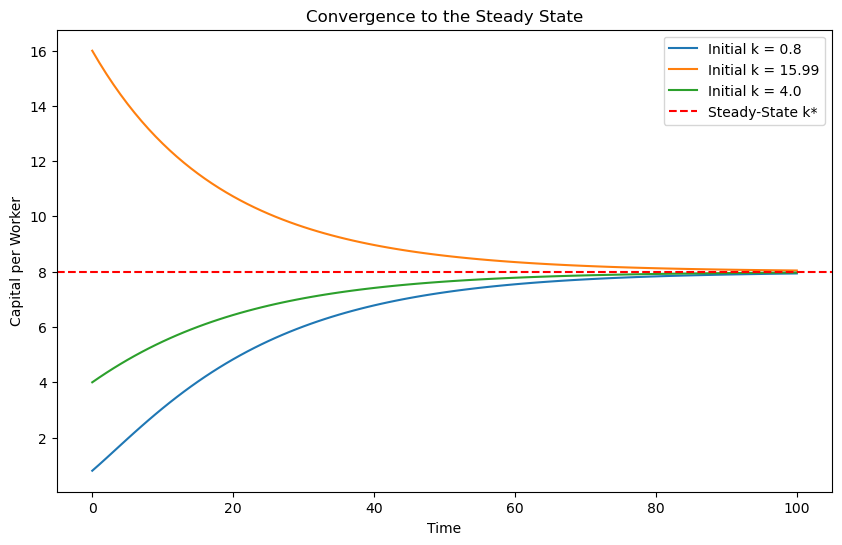

In [134]:
# Parameters
s = 0.3       # saving rate
delta = 0.05  # depreciation rate
n = 0.02      # population growth rate
alpha = 0.3   # capital share
A = 1         # TFP

# Compute steady-state capital per worker
k_star = ((s * A) / (n + delta))**(1/(1 - alpha))

# Let's say we have three economies with different initial conditions
initial_capitals = [0.1*k_star, 2*k_star, 0.5*k_star]  # some start below, some above

time_steps = 100
fig, ax = plt.subplots(figsize=(10,6))

for k0 in initial_capitals:
    k_path = [k0]
    k = k0
    for t in range(time_steps):
        # Law of motion: k_{t+1} = s A k_t^alpha + (1 - delta - n) k_t
        k = s*A*k**alpha + (1 - delta - n)*k
        k_path.append(k)
    ax.plot(k_path, label=f"Initial k = {round(k0, 2)}")

# Plot the steady-state line
ax.axhline(y=k_star, color='red', linestyle='--', label='Steady-State k*')

ax.set_xlabel("Time")
ax.set_ylabel("Capital per Worker")
ax.set_title("Convergence to the Steady State")
ax.legend()
plt.show()


## **Conclusion**

In this project, we aim to find and discuss how well Solow growth models can approximate the time for a country to achieve steady-state economies, we first created a correlation analysis between countries, by dividing them into three different levels of income countries, we did a detailed internal and cross-regional analysis between them.  The correlation analysis shows distinct patterns across high-income, middle-income, and low-income countries. We denote relatively strong correlations among High-income countries, reflecting similar economic structures and global interdependencies, with particularly high correlations observed between countries like Canada, Germany, and the United States except for Saudi Arabia, averaging ~ *0.292* correlation with other high-income countries. Middle-income countries show greater variability, with moderate correlations among some countries but weaker or even negative correlations for others, indicating diverse economic conditions and regional influences. Low-income countries, on the other hand, have predominantly weaker correlations, suggesting disparate economic trajectories and limited global integration. Furthermore, cross-income group correlations decline significantly, with the highest correlation observed between high-income and middle-income groups, while correlations involving low-income countries remain minimal. These patterns highlight the alignment within high-income groups and the increasing economic divergence as income levels decrease

In part two of the correlation analysis, we can see regional patterns of economic interdependence and variation in cross-regional relationships. North America shows the highest internal correlation, reflecting strong economic integration, while Latin America and Asia demonstrate moderate internal correlations with more variability. Cross-regionally, North America has the strongest economic ties with Latin America, while Latin America and Asia show weaker connections.

Moving on to our regression analysis part, we found out that log(GDP Per Capita) is a better indicator of economic welfare compared to log(GDP) when evaluated against non-economic factors such as life expectancy and civil liberties index, and when comparing the two graphs we created, we seem to have a better regression fit when taking life expectancy as the variable against log(GDP per capita).

Lastly, the steady-state analysis revealed key insights into the behavior of capital per worker across different economies. We observed that economies generally **hover around their steady-state capital level**, rarely remaining exactly at equilibrium due to frequent external and internal shocks. From the growth rate comparisons, we saw that during **economic downturns**, such as the Global Financial Crisis of 2009, the COVID-19 pandemic of 2020, or regional crises like Thailand's 1998 financial collapse and Argentina's 2002 debt default, capital growth fell below the steady-state level. However, **recovery periods** often demonstrated a temporary rebound, where capital growth rates surpassed the steady-state as economies regained momentum. The convergence patterns we graphed further validated the Solow model’s prediction that economies, regardless of their starting point, move toward a steady-state capital level over time. Notably, pre-set positive and negative shocks illustrated that while short-term deviations occur, **capital accumulation eventually stabilizes** at steady-state levels, aligning with diminishing returns to capital. These results emphasize both the predictability of long-term economic behavior under the Solow framework and the dynamic nature of real-world economies in responding to shocks. However, it is important to note that our analysis may have **selection bias**, as we relied on data for countries and time ranges with minimal missing values, which may limit the generalizability of our findings to all economies.

## **Works Cited**

The World Bank. (2024). GDP (constant 2015 US). Retrieved December 14, 2024, from [https://data.worldbank.org/indicator/NY.GDP.MKTP.KD](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD)  
The World Bank. (2024). Gross domestic savings (% of GDP). Retrieved December 14, 2024, from [https://data.worldbank.org/indicator/NY.GDS.TOTL.ZS](https://data.worldbank.org/indicator/NY.GDS.TOTL.ZS)  
The World Bank. (2024). Gross fixed capital formation (constant 2015 US$). Retrieved December 14, 2024, from [https://data.worldbank.org/indicator/NE.GDI.TOTL.KD](https://data.worldbank.org/indicator/NE.GDI.TOTL.KD)  
The World Bank. (2024). Labor force, total. Retrieved December 14, 2024, from [https://data.worldbank.org/indicator/SL.TLF.TOTL.IN](https://data.worldbank.org/indicator/SL.TLF.TOTL.IN)  
Our World in Data. (2024). Gini index (World Bank estimate). Retrieved December 14, 2024, from [https://ourworldindata.org/grapher/economic-inequality-gini-index](https://ourworldindata.org/grapher/economic-inequality-gini-index)  
Our World in Data. (2024). Human rights index (V-Dem). Retrieved December 14, 2024, from [https://ourworldindata.org/grapher/human-rights-index-vdem](https://ourworldindata.org/grapher/human-rights-index-vdem)  
Our World in Data. (2024). Life expectancy at birth. Retrieved December 14, 2024, from [https://ourworldindata.org/life-expectancy](https://ourworldindata.org/life-expectancy)  
Our World in Data. (2024). Political regime. Retrieved December 14, 2024, from [https://ourworldindata.org/grapher/political-regime](https://ourworldindata.org/grapher/political-regime)  
The World Bank. (2024). Population, total. Retrieved December 14, 2024, from [https://data.worldbank.org/indicator/SP.POP.TOTL](https://data.worldbank.org/indicator/SP.POP.TOTL)  

Voss, G. (n.d.). *Aspects of Canadian and US business cycles*. Banque du Canada. Retrieved from [https://www.banqueducanada.ca/wp-content/uploads/2010/08/aspects.pdf](https://www.banqueducanada.ca/wp-content/uploads/2010/08/aspects.pdf)  

Jacobo, A. D., & Marengo, A. (2020, July 10). *Are the business cycles of Argentina and Brazil different? New features and stylized facts*. *Paradigma Económico: Revista de Economía Regional y Sectorial*. Retrieved from [https://www.redalyc.org/journal/4315/431564346002/html/](https://www.redalyc.org/journal/4315/431564346002/html/)  

Stokes, B. (2016, September 13). *Hostile neighbors: China vs. Japan*. Pew Research Center. Retrieved from [https://www.pewresearch.org/global/2016/09/13/hostile-neighbors-china-vs-japan/](https://www.pewresearch.org/global/2016/09/13/hostile-neighbors-china-vs-japan/)  

Cristiani, N., & Cuevas, F. (2024, June 28). *Strong demand, scarce supply: Unearthing profits from critical raw materials in Latin America*. *J.P. Morgan Private Bank Latin America*. Retrieved from [https://privatebank.jpmorgan.com/latam/en/insights/markets-and-investing/strong-demand-scarce-supply-unearthing-profits-from-critical-raw-materials-in-latin-america](https://privatebank.jpmorgan.com/latam/en/insights/markets-and-investing/strong-demand-scarce-supply-unearthing-profits-from-critical-raw-materials-in-latin-america)  

Biblioteca del Congreso Nacional de Chile. (2008, June 2). *Future and current ties between Latin America and Asia*. *Programa Asia Pacífico: Observatorio Asia-Pacífico*. Retrieved from [https://www.bcn.cl/observatorio/asiapacifico/noticias/future-and-current-ties-between-latin-america-and-asia](https://www.bcn.cl/observatorio/asiapacifico/noticias/future-and-current-ties-between-latin-america-and-asia)  
